# Part-I: GDP Analysis of the Indian States

# Part I-A

In [1]:
# Importing required packages 
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data file into a Data Frame required for Part I-A
path = r'C:\Users\akshay.nasarpuri\Documents\Jupyter\Data_Assignment\Part_I_A_Data'
file = glob.glob(path + '/*.csv')
df = pd.read_csv(file[0])

# check if the df is loaded with values by using df.head()
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
# Check the structure of the data frame, types of columns, etc
print(df.shape)
print(df.info())

(11, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya           

### Fixing Rows and Columns
#### Checklist for fixing rows:
- There are no __Summary Rows__, such as Total, subtotal rows
- There are no __Incorrect Rows__, such as header,footer rows
- There are no __Extra Rows__, such as Column numbers, indicators, blank rows, Page No.

#### Checklist for fixing columns:
- No need to __Merge Columns__ for uniquie identifier
- No need of __Splitting Columns__ for more data
- No need of __Adding column names__, since none of the column names are missing
- No need of __Renaming Column Names__, since they seem consistent and no encoded column names found
- No need of __Aligning columns__, since the dataset does not have any shifted columns
- __Deleting Columns__ may be required, but that will be checked below under missing values

In [4]:
# Check for null values
# Summing up the missing values (column-wise)
print(df.isnull().sum(axis=0))

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

__It can be observed that the column name 'West Bengal1' has 11 missing values and checking by the shape of the data frame before, there are 11 rows, which means 100% of the values under the column 'West Bengal1' are missing, but to make sure lets calculate the percentage of missing values for each column. Also let's check if there are any other such columns with 100% missing values__

In [5]:
# Check the number of columns that have 100% missing values
print('No. of columns with ALL the rows having missing values:',df.isnull().all(axis=0).sum())

# get the percentage of missing values in each column
print(round(100*(df.isnull().sum(axis=0) / len(df.index)),2))

No. of columns with ALL the rows having missing values: 1
Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telang

Here we observe that 100% of the values under column __West Bengal1__ are missing. Let's drop that column

In [6]:
# Dropping the column West Bengal1
df = df.drop('West Bengal1',axis=1)

# Check the shape
print(df.shape)

# Check the percentage of missing values in each column again
print(round(100*(df.isnull().sum(axis=0) / len(df.index)),2))

(11, 35)
Items  Description            0.00
Duration                      0.00
Andhra Pradesh                0.00
Arunachal Pradesh            18.18
Assam                        18.18
Bihar                        18.18
Chhattisgarh                  0.00
Goa                          18.18
Gujarat                      18.18
Haryana                       0.00
Himachal Pradesh             36.36
Jammu & Kashmir              18.18
Jharkhand                    18.18
Karnataka                    18.18
Kerala                       18.18
Madhya Pradesh                0.00
Maharashtra                  36.36
Manipur                      36.36
Meghalaya                     0.00
Mizoram                      36.36
Nagaland                     36.36
Odisha                        0.00
Punjab                       36.36
Rajasthan                    36.36
Sikkim                       18.18
Tamil Nadu                    0.00
Telangana                     0.00
Tripura                      36.36
Uttar Prade

__As of now let's not drop any rows from the columns or impute. Based on the next question, decision will be taken for handling missing values__

### Q1: Plot a graph for rows " % Growth over previous year" for all the states (not union territories) whose data is available, use as much data as possible for this exercise. Use the best fit line to represent the growth for each state. Draw a similar line graph for the nation as well.

In [7]:
# Create a list of Union Terretories
union_terretories_list = ['Delhi','Chandigarh','Puducherry','Andaman & Nicobar Islands']

# Drop the Union Terretories as per the requirement
df = df.drop(union_terretories_list,axis=1)

# Check the filtered data frame
print(df.shape)
print(df.info())

(11, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 31 columns):
Items  Description    11 non-null object
Duration              11 non-null object
Andhra Pradesh        11 non-null float64
Arunachal Pradesh     9 non-null float64
Assam                 9 non-null float64
Bihar                 9 non-null float64
Chhattisgarh          11 non-null float64
Goa                   9 non-null float64
Gujarat               9 non-null float64
Haryana               11 non-null float64
Himachal Pradesh      7 non-null float64
Jammu & Kashmir       9 non-null float64
Jharkhand             9 non-null float64
Karnataka             9 non-null float64
Kerala                9 non-null float64
Madhya Pradesh        11 non-null float64
Maharashtra           7 non-null float64
Manipur               7 non-null float64
Meghalaya             11 non-null float64
Mizoram               7 non-null float64
Nagaland              7 non-null float64
Odisha                

In [8]:
# Create new Data frame, which will contain data ONLY related to "% Growth over previous year"

# First create a new column named 'Indexes' that will contain an integer other than -1,if the substring to be searched is found.
# if not found, then it will put -1 as the value
df['Indexes'] = df['Items  Description'].str.find('Growth') 

# Create new data frame   
growth_df = df[df['Indexes'] != -1]

# Check the new data frame
growth_df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP,Indexes
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86,3
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97,3
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65,3
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99,3
10,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52,3


To plot the graph for rows __" % Growth over previous year"__ for all the states, The duration needs to be converted to integers, since these will be plotted for x-axis. For this first df needs to be sorted in ascending order on __Duration__ columns and then a custom index will be set for the data frame

In [9]:
# Sort the df on 'Duration' in ascending order
growth_df['Duration'].sort_values(ascending=True)

# Set the index starting from 1
growth_df = growth_df.set_index([pd.Index(list(range(1,len(growth_df.index)+1)))])
                                 
# Check the data frame
growth_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP,Indexes
1,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86,3
2,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97,3
3,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65,3
4,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99,3
5,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52,3


Drop the unnecessary columns that are not required for plotting the graph. These columns are __'Items Description','Duration', 'All_India_GDP', and 'Indexes'__

In [10]:
# Create a list of columns to drop
cols_to_drop_list = ['Items  Description','Duration', 'Indexes']

# Drop the columns in the aboive list
growth_df = growth_df.drop(cols_to_drop_list,axis=1)

# Check the data frame
print(growth_df.shape)
growth_df

(5, 29)


,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
1,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
2,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
3,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
4,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
5,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


__Now the data frame has only the states(28) and the index. Plotting the graphs will be better now, since looping over the states is required to plot 28 graphs__ <br>
__Choosing 'SCATTER PLOT' to represent the trend of % growth over previous years of every state with a BEST FIT LINE__

In [11]:
# Checking the missing value percentage (column-wise) of the new data frame
print(round(100*(growth_df.isnull().sum(axis=0) / len(growth_df.index)),2))

Andhra Pradesh        0.0
Arunachal Pradesh    20.0
Assam                20.0
Bihar                20.0
Chhattisgarh          0.0
Goa                  20.0
Gujarat              20.0
Haryana               0.0
Himachal Pradesh     40.0
Jammu & Kashmir      20.0
Jharkhand            20.0
Karnataka            20.0
Kerala               20.0
Madhya Pradesh        0.0
Maharashtra          40.0
Manipur              40.0
Meghalaya             0.0
Mizoram              40.0
Nagaland             40.0
Odisha                0.0
Punjab               40.0
Rajasthan            40.0
Sikkim               20.0
Tamil Nadu            0.0
Telangana             0.0
Tripura              40.0
Uttar Pradesh        20.0
Uttarakhand          20.0
All_India GDP         0.0
dtype: float64


The __Percentage__ values are less than __50__, it's better to __ignore__ them rathen imputing or deleting them, since imputing or deleting might exaggerate the values

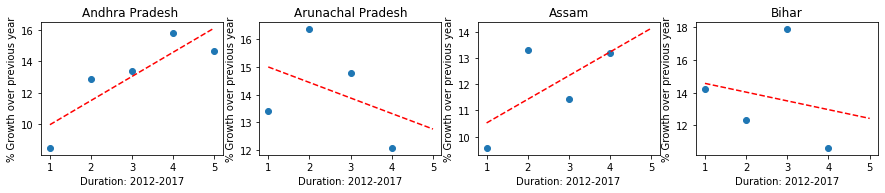

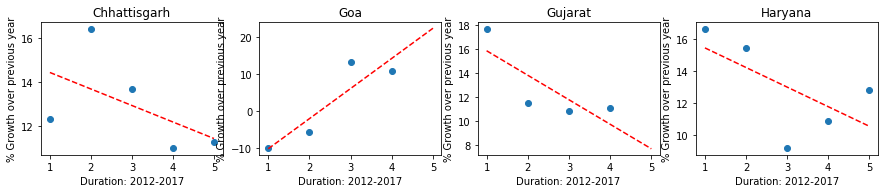

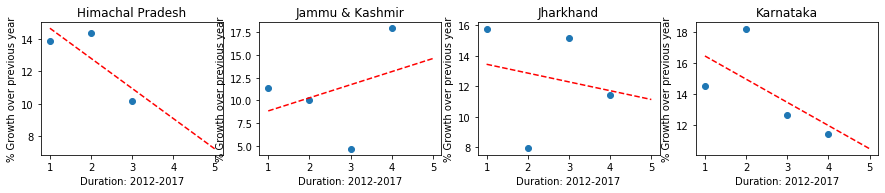

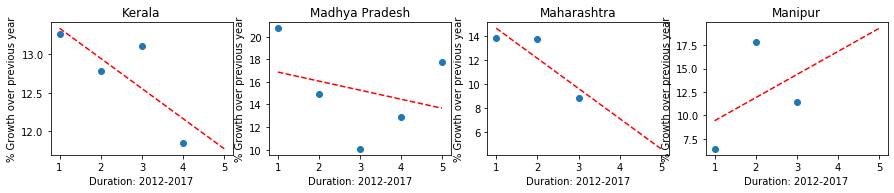

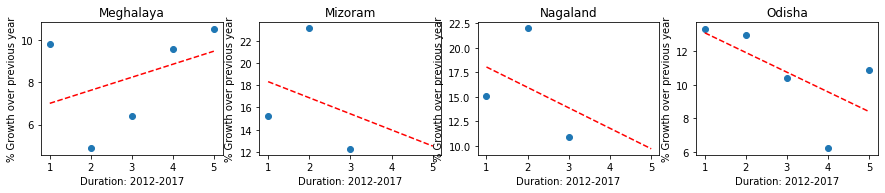

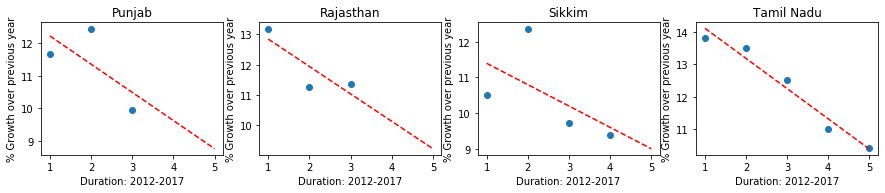

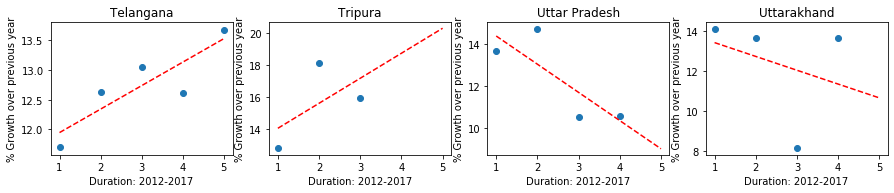

In [12]:
# looping over the states to create state-wise scatter plots
fig = 1
cnt = 1
slope_list = []
average_growth_list = []
for col in growth_df.columns:
    
    if col != 'All_India GDP':
        # setting the figure and figure size
        plt.figure(fig,figsize=(15,20))

        # creating subplots with 7 rows and 4 columns since there are 28 states
        plt.subplot(7,4,cnt)

        # Since few States have NaNs in them, 'cleaning them up" by only considering the indexes that are finite.
        idx = np.isfinite(growth_df.index) & np.isfinite(growth_df[col])

        # setting plot attributes
        plt.title(col)
        plt.xlabel('Duration: 2012-2017')
        plt.ylabel('% Growth over previous year')

        # plotting the scatter plot
        plt.scatter(x=growth_df.index,y=growth_df[col])

        # generating the BEST-FIT line by calculating the m and c values of the eq y=mx+c of linear line
        m,c = np.polyfit(growth_df.index[idx], growth_df[col][idx], 1)
        
        # to store the slopes of each state in a list (will be useful for answering the next set of questions)
        slope_list.append(m)
        
        # to store the average growth rate of each state in a list (will be useful for answering the next set of questions)
        average_growth_list.append(growth_df[col].mean())

        #plotting the graph
        plt.plot(growth_df.index, m*growth_df.index + c, '--r')

        # condition to calculate the value of figure number and subplot number
        if cnt / 4 == 1:
            cnt = 1
            fig +=1
            plt.show()
        else:
            cnt+=1    

### Scatter plot and BEST-FIT line for India

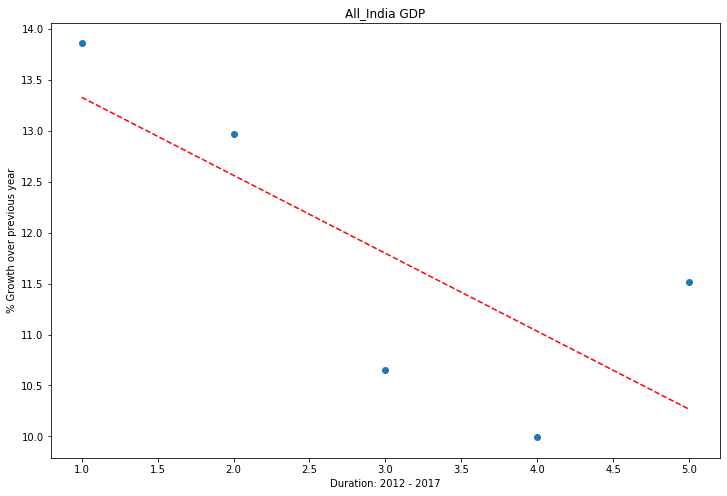

In [13]:
plt.figure(fig,figsize=(12,8))
col = 'All_India GDP'

# setting plot attributes
plt.title(col)
plt.xlabel('Duration: 2012 - 2017')
plt.ylabel('% Growth over previous year')

# plotting the scatter plot
plt.scatter(x=growth_df.index,y=growth_df[col])

# generating the BEST-FIT line by calculating the m and c values of the eq y=mx+c of linear line
m,c = np.polyfit(growth_df.index, growth_df[col], 1)

# append the slope of 'All_India GDP' to the previous created slope_list
slope_list.append(m)

# append the average growth rate of 'All_India GDP' to the previous created slope_list
average_growth_list.append(growth_df[col].mean())

#plotting the graph
plt.plot(growth_df.index, m*growth_df.index + c, '--r')

# show the graph
plt.show()

In [14]:
growth_df

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
1,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
2,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
3,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
4,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
5,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


## Q1.1 How will you compare the growth rates of any two states?

#### Ans: To compare the growth rates of any two states, the slope of each state for % growth over previous year needs to be calculated. Here the slope is already calculated in the previous step while plotting the scatter graphs in the list named 'slope_list'

(29, 7)


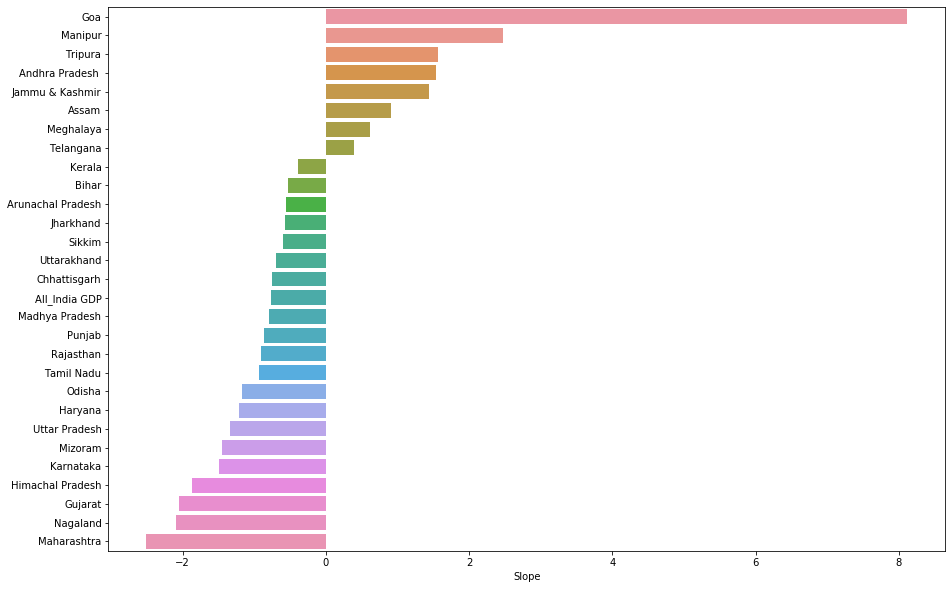

In [15]:
# Transpose the data frame growth_df
growth_df = growth_df.T

# Create a new column named slope using the so-calculated list named 'slope_list'
growth_df['Slope'] = slope_list

# Create a new column named slope using the so-calculated list named 'average_growth_list' (will be used in the next ques)
growth_df['Average Growth'] = average_growth_list

# Check the shape of the data frame
print(growth_df.shape)

# Sort the data frame in the descending order by column = 'Slope'
growth_df = growth_df.sort_values(by='Slope', ascending=False)

# plot the bar graph to visualize the slope of each state
plt.figure(figsize=(15,10))
sns.barplot(y=growth_df.index, x=growth_df['Slope'])
plt.show()

Visualizing the above graph, __Goa__ has the maximum slope, which means that Goa has the hightest __GROWTH RATE__ compared to other states and similarly __Maharashtra__ has the least __GROWTH RATE__

## Q1.2 Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.

### Ans: By calculating the average growth rate of each state, i.e, calculating the mean of % growth over previous years for each state

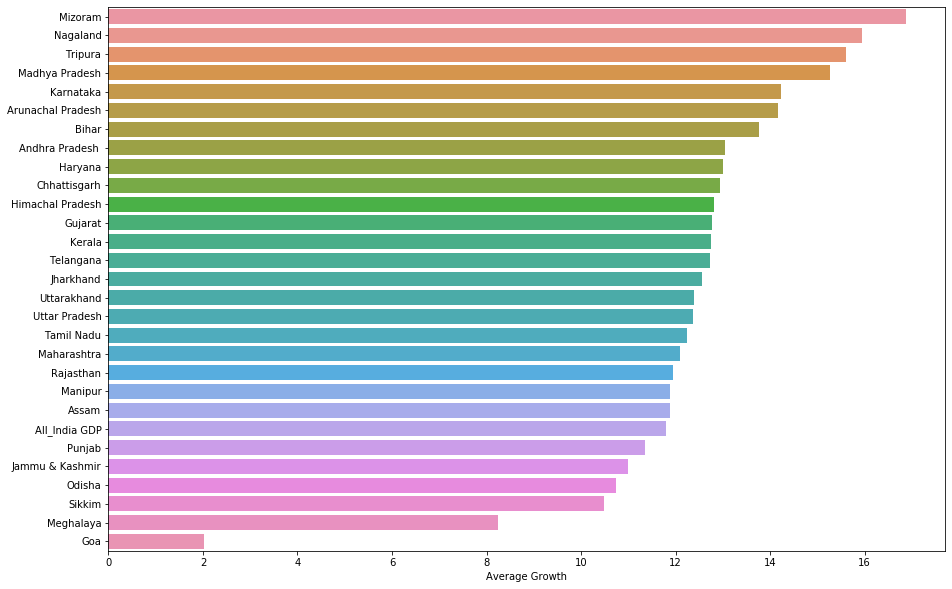

In [16]:
# Sort the data frame in the descending order by column = 'Average Growth'
growth_df = growth_df.sort_values(by='Average Growth', ascending=False)

# Create a new column which will store the ranks
growth_df['Rank_Average_Growth'] = list(range(1,growth_df.shape[0] + 1))

# plot the bar graph to visualize the Average growth rate of each state
plt.figure(figsize=(15,10))
sns.barplot(y=growth_df.index, x=growth_df['Average Growth'])
plt.show()

Based on the above graph, it can be concluded that the __TOP 3 fasteset states__ are:
- 1: Mizoram
- 2: Nagaland
- 3: Tripura

And the __3 slowest growing states__ are:
- 1: Sikkim
- 2: Meghalaya
- 3: Goa

In [17]:
# Check the ranks of top 3 fastest growing states
growth_df.head(3)

,1,2,3,4,5,Slope,Average Growth,Rank_Average_Growth
Mizoram,15.20,23.10,12.30,NaN,NaN,-1.45,16.866667,1
Nagaland,15.03,21.98,10.85,NaN,NaN,-2.09,15.953333,2
Tripura,12.78,18.14,15.92,NaN,NaN,1.57,15.613333,3


In [18]:
# Check the ranks of 3 slowest growing states
growth_df.tail(3)

,1,2,3,4,5,Slope,Average Growth,Rank_Average_Growth
Sikkim,10.51,12.35,9.72,9.39,NaN,-0.599,10.4925,27
Meghalaya,9.81,4.87,6.41,9.58,10.55,0.619,8.2440,28
Goa,-10.02,-5.77,13.12,10.75,NaN,8.120,2.0200,29


## Q1.3 What is the Nation's growth rate? 

### Ans: Nation's growth rate is 11.79 as an average over the period 2012-2017, which when compared to individual states ranks at 23rd place

In [19]:
# give name to the index column
growth_df.index.name = 'States'

# get the average growth and rank average growth of India
growth_df.loc[['All_India GDP'], ['Average Growth', 'Rank_Average_Growth']]

,Average Growth,Rank_Average_Growth
States,,
All_India GDP,11.798,23


## Q1.4 What has been the growth rate of your home state, and how does it compare to the national growth rate?

### Ans: Growth rate of my home state 'Uttar Pradesh' is better compared to the national growth rate

In [20]:
# get the average growth and rank average growth of my home state-Uttar Pradesh and India
home_vs_nation_df = growth_df.loc[['Uttar Pradesh','All_India GDP'], ['Average Growth', 'Rank_Average_Growth']]
home_vs_nation_df

,Average Growth,Rank_Average_Growth
States,,
Uttar Pradesh,12.3675,17
All_India GDP,11.7980,23


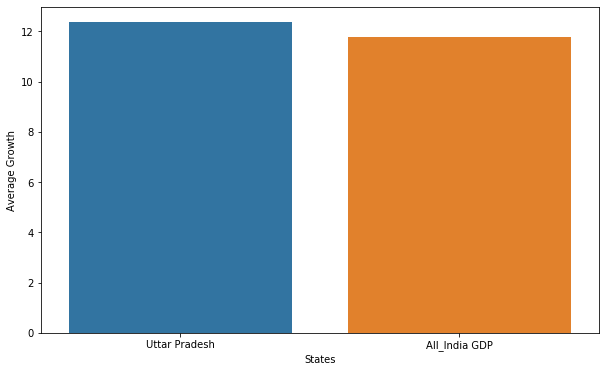

In [21]:
# create bar graph for better visualization
plt.figure(figsize=(10,6))
sns.barplot(x=home_vs_nation_df.index, y=home_vs_nation_df['Average Growth'])
plt.show()

# Q2: Plot the total GDP of the states for the year 2015-16:

In [22]:
# filter out the data related to GDSP from the main data frame. 

# Create new data frame for GDP, Using the 'Indexes' column used above for filtering out %growth rows to filter out GDP rows
gdp_df = df[df['Indexes'] == -1]

# Check the new data frame
gdp_df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP,Indexes
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,8736039.0,-1
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,9946636.0,-1
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,11236635.0,-1
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,12433749.0,-1
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0,-1


In [23]:
# Create new Data frame with filtered row consisting of the year 2015-16
gdp_15_16_df = gdp_df[gdp_df['Duration'] == '2015-16']

# drop the irrelavant columns such as 'Duration', 'Items Description', 'Indexes' and 'All_India GDP'

# Create a list of columns to drop
cols_to_drop_list = ['Items  Description','Duration', 'Indexes', 'All_India GDP']


# Drop the columns in the aboive list
gdp_15_16_df = gdp_15_16_df.drop(cols_to_drop_list,axis=1)

# Check the data frame
print(gdp_15_16_df.shape)

# transpose the data frame
gdp_15_16_df = gdp_15_16_df.T

# rename the column 4 to GSDP
gdp_15_16_df = gdp_15_16_df.rename(columns={4: "GSDP"})

# Sort the data frame in the descending order by column = 'GSDP'
gdp_15_16_df = gdp_15_16_df.sort_values(by='GSDP', ascending=False)

# check the data frame
gdp_15_16_df.head()

(1, 28)


,GSDP
Tamil Nadu,1212668.0
Uttar Pradesh,1153795.0
Karnataka,1027068.0
Gujarat,994316.0
Andhra Pradesh,609934.0


In [24]:
# check for missing values (column-wise)
gdp_15_16_df.isnull().sum()

GSDP    8
dtype: int64

In [25]:
# check for missing values (row-wise)
gdp_15_16_df.isnull().sum(axis=1)

Tamil Nadu           0
Uttar Pradesh        0
Karnataka            0
Gujarat              0
Andhra Pradesh       0
Kerala               0
Telangana            0
Madhya Pradesh       0
Haryana              0
Bihar                0
Odisha               0
Chhattisgarh         0
Jharkhand            0
Assam                0
Uttarakhand          0
Jammu & Kashmir      0
Goa                  0
Meghalaya            0
Arunachal Pradesh    0
Sikkim               0
Himachal Pradesh     1
Maharashtra          1
Manipur              1
Mizoram              1
Nagaland             1
Punjab               1
Rajasthan            1
Tripura              1
dtype: int64

__Remove the rows with missing values since in this data frame there is only 1 column and 8 of them have Nan values__

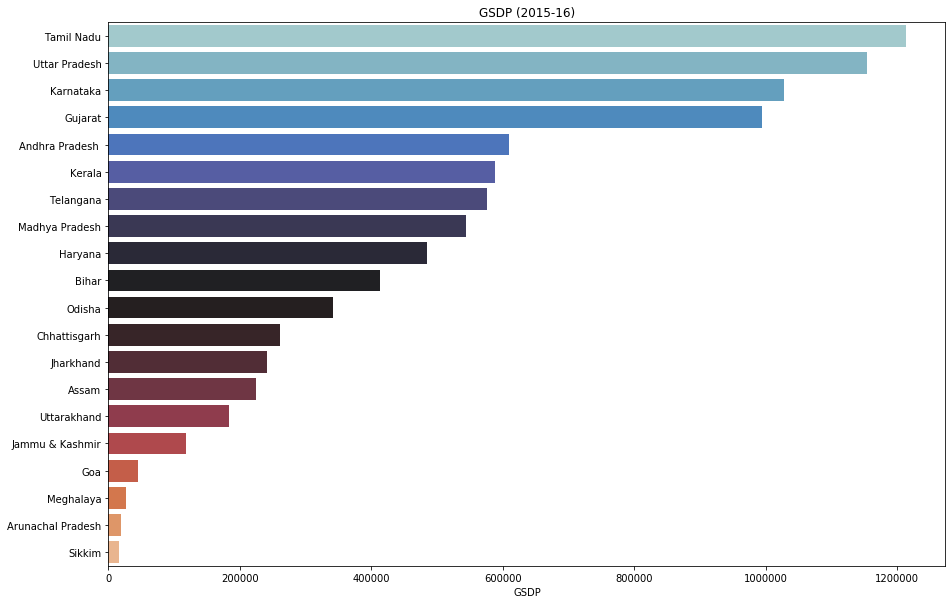

In [26]:
# removing missing values
gdp_15_16_df = gdp_15_16_df.dropna(axis=0)


# plot the bar graph for total gdp for the remaining states
plt.figure(figsize=(15,10))
plt.title('GSDP (2015-16)')
sns.barplot(y=gdp_15_16_df.index, x=gdp_15_16_df['GSDP'],palette='icefire')
plt.show()

## Q2.1 Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)

### Ans: A bar graph can be used, since out of 28 states, 8 states have missing values for __Total GSDP__. So the remaining are 20 states and the values can be easily visualized using a simple bar graph.

## Q2.2 Identify the top 5 and the bottom 5 states based on total GDP.

### Ans: <br>

### The top 5 states based on total GDP are:
- Rank 1: Tamil Nadu
- Rank 2: Uttar Pradesh
- Rank 3: Karnataka
- Rank 4: Gujarat
- Rank 5: Andhra Pradesh

### The bottom 5 states based on total GDP are:
- Rank 16: Jammu and Kashmir
- Rank 17: Goa
- Rank 18: Meghalaya
- Rank 19: Arunachal Pradesh
- Rank 20: Sikkim

In [27]:
# Create a new column which will store the ranks
gdp_15_16_df['Rank_State_GDP'] = list(range(1,gdp_15_16_df.shape[0] + 1))

# Check the ranks of top 5  states based on total GDP
gdp_15_16_df.head(5)

,GSDP,Rank_State_GDP
Tamil Nadu,1212668.0,1
Uttar Pradesh,1153795.0,2
Karnataka,1027068.0,3
Gujarat,994316.0,4
Andhra Pradesh,609934.0,5


In [28]:
# check the ranks of bottom 5 states based on total GDP
gdp_15_16_df.tail(5)

,GSDP,Rank_State_GDP
Jammu & Kashmir,118387.0,16
Goa,45002.0,17
Meghalaya,26745.0,18
Arunachal Pradesh,18784.0,19
Sikkim,16637.0,20


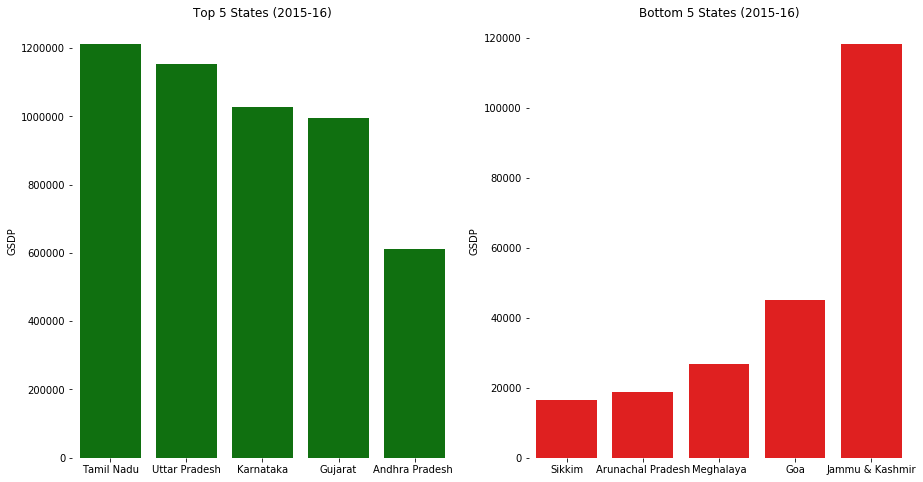

In [29]:
gdp_15_16_top_5_df = gdp_15_16_df.head(5)
gdp_15_16_bottom_5_df = gdp_15_16_df.tail(5)
gdp_15_16_bottom_5_df = gdp_15_16_bottom_5_df.sort_values(by='GSDP')

# plot graph for top 5 states in 2015-16
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('Top 5 States (2015-16)')
sns.barplot(x=gdp_15_16_top_5_df.index,y=gdp_15_16_top_5_df.GSDP,color='green')
sns.despine(left=True, bottom=True)

# plot graph for bottom 5 states in 2015-16
plt.subplot(122)
plt.title('Bottom 5 States (2015-16)')
sns.barplot(x=gdp_15_16_bottom_5_df.index,y=gdp_15_16_bottom_5_df.GSDP,color='red')
sns.despine(left=True, bottom=True)
plt.show()

## Q2.3: What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)

### Ans: Based on the below two graphs, it can be concluded that 75% of the states have individual gsdp contribution, which is less than 6.5 %.
The states which are performing extremely poor are the ones whose contribution is not even 1% to the total GDP of the nation. These are:
- Goa
- Meghalaya
- Arunachal Pradesh
- Sikkim

In [30]:
# give name to the index column
gdp_15_16_df.index.name = 'States'

# Calculate the % contribution of gsdp w.r.t nation's GDp
gdp_15_16_df['% GSDP'] = round(100*(gdp_15_16_df['GSDP'] / gdp_15_16_df['GSDP'].sum()),2)

In [31]:
# check the data frame
gdp_15_16_df.head()

,GSDP,Rank_State_GDP,% GSDP
States,,,
Tamil Nadu,1212668.0,1,13.35
Uttar Pradesh,1153795.0,2,12.70
Karnataka,1027068.0,3,11.31
Gujarat,994316.0,4,10.95
Andhra Pradesh,609934.0,5,6.72


In [32]:
# Check the statistics of the column '% GSDP'
gdp_15_16_df['% GSDP'].describe()

count    20.000000
mean      5.000000
std       4.239825
min       0.180000
25%       1.847500
50%       4.155000
75%       6.540000
max      13.350000
Name: % GSDP, dtype: float64

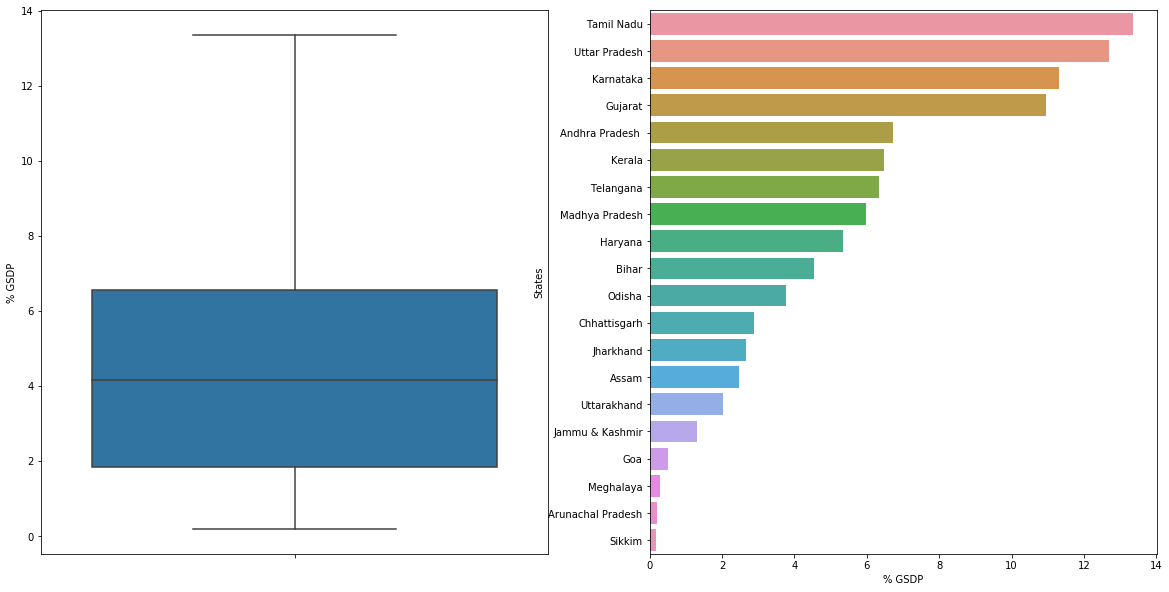

In [33]:
# create a box plot and bar graph side by side to visualize the % contibution of various states to the total GDP of the nation
plt.figure(figsize=(20,10))

# box plot
plt.subplot(121)
sns.boxplot(y=gdp_15_16_df['% GSDP'])

# bar plot
plt.subplot(122)
sns.barplot(x=gdp_15_16_df['% GSDP'], y=gdp_15_16_df.index)
plt.show()

# Part I-B

In [34]:
# load the data file into a Data Frame required for Part I-B
path = r'C:\Users\akshay.nasarpuri\Documents\Jupyter\Data_Assignment\Part_I_B_Data'
all_files = glob.glob(path + '/*.csv')

In [35]:
# Empty list to add all the dataframes
li = []

# Loop to read each file with the path given in the filename variable.
for filename in all_files:
    
    # Reading each file as a pandas dataframe
    df = pd.read_csv(filename, encoding='cp1252')
    
    # Eliminate all the values from rows of column 'S.No.' that have '.' or float type values
    df=df[~df["S.No."].str.contains("\.")]
    
    # get relevant columns from the data frame
    date_ser =df['2014-15']
    item_ser = df['Item']
    sno_ser = df['S.No.']
    
    # create new data frame
    temp_dict = {'S.No.':sno_ser,'Item':item_ser,'2014-15':date_ser}
    new_df = pd.DataFrame(temp_dict)

    # Transpose the data frame
    new_df = new_df.T

    # Taking the header row
    #grab the second row for the header
    new_header = new_df.iloc[1]

    #take the data less the header rows
    new_df= new_df[2:] 

    # Assign the new header
    new_df.columns = new_header 

    # Add the State name from the filename
    new_df.loc[:,'State'] = filename.split('\\')[-1].split('.')[0].split('NAD-')[-1].split('-GSVA')[0]

    # Append the final DF to the list
    li.append(new_df)

# Creating a final DF by joining all the df's in the list li
final_df = pd.concat(li, axis=0, ignore_index=True, sort=False)  

In [36]:
# Check final data frame
print(final_df.shape)
print(final_df.info())

(32, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 21 columns):
Agriculture, forestry and fishing                                       32 non-null object
Mining and quarrying                                                    31 non-null object
Primary                                                                 32 non-null object
Manufacturing                                                           31 non-null object
Electricity, gas, water supply & other utility services                 31 non-null object
Construction                                                            31 non-null object
Secondary                                                               32 non-null object
Trade, repair, hotels and restaurants                                   31 non-null object
Transport, storage, communication & services related to broadcasting    31 non-null object
Financial services                                                   

# Q1: Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the central, not state governments.

In [37]:
# Create a list of Union Terretories
union_terretories_list = ['Delhi','Chandigarh','Puducherry','Andaman_Nicobar_Islands']

# remove the rows where state is a Union Territory
for ut in union_terretories_list:
    final_df = final_df[~(final_df['State'] == ut)]
    
# check new data frame
print(final_df.shape)
final_df.head()

(28, 21)


,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,...,Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State
1,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,...,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977,Andhra_Pradesh
2,686117,30842,716959,26120,113527,147842,287489,60421,35203,25207,...,243867,218728,631844,1636292,70099,30272,1676119,14870,112718,Arunachal_Pradesh
3,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,543651,...,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621,Assam
4,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,1178022,...,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954,Bihar
6,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,...,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860,Chhattisgarh


# Q2: Plot the GDP per capita for all the states.

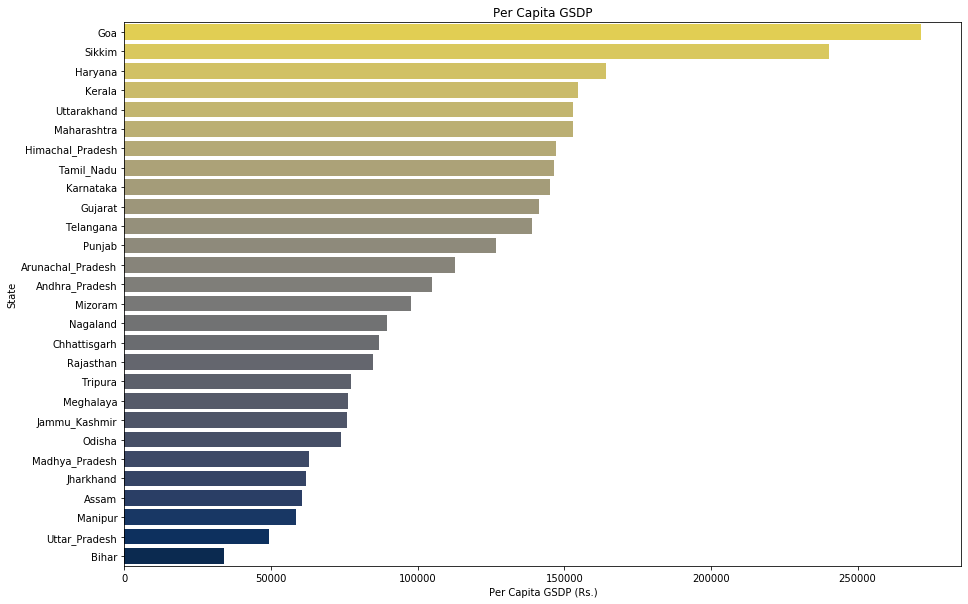

In [38]:
# Sort the data frame by 'Per Capita GSDP (Rs.)'
final_df = final_df.sort_values(by='Per Capita GSDP (Rs.)', ascending=False)

# Plot a bar graph for visualization
plt.figure(figsize=(15,10))
plt.title('Per Capita GSDP')
sns.barplot(x='Per Capita GSDP (Rs.)', y='State', data=final_df, palette='cividis_r')
plt.show()

## Q2.1 Identify the top 5 and the bottom 5 states based on the GDP per capita.

### Ans: 
### Top 5 states based on GDP per capita
- Goa
- Sikkim
- Haryana
- Kerala
- Uttarakhand

### Bottom 5 states based on GDP per capita
- Jharkhand
- Assam
- Manipur
- Uttar Pradesh
- Bihar

In [39]:
# fetch the top 5 states based on GDP per capita
final_df.loc[:,['State']].head(5)

,State
8,Goa
26,Sikkim
10,Haryana
15,Kerala
30,Uttarakhand


In [40]:
# fetch the bottom 5 states based on GDP per capita
final_df.loc[:,['State']].tail()

,State
13,Jharkhand
3,Assam
18,Manipur
31,Uttar_Pradesh
4,Bihar


## Q2.2: Find the ratio of the highest per capita GDP to the lowest per capita GDP.

### Ans: Ratio of Hightest per capita GDP to lowest per capita GDP is 0.12

In [41]:
# Find the min and max value of the column 'Per Capita GSDP (Rs.)' and find the ratio
ratio_hightest_lowest = round(min(final_df['Per Capita GSDP (Rs.)']) / max(final_df['Per Capita GSDP (Rs.)']),2)
print('Ratio Hightest per capita GDP to lowest:',ratio_hightest_lowest)

Ratio Hightest per capita GDP to lowest: 0.12


# Q3: Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [42]:
# First the columns 'Primary', 'Secondary' and 'Tertiary' need be to converted to numeric type from object type
final_df['Primary'] = pd.to_numeric(final_df['Primary'])
final_df['Secondary'] = pd.to_numeric(final_df['Secondary'])
final_df['Tertiary'] = pd.to_numeric(final_df['Tertiary'])
final_df['Gross State Domestic Product'] = pd.to_numeric(final_df['Gross State Domestic Product'])

# create new columns for % contribution of primary,secondary & tertiary sectors as a percentage of the total GDP for all states 
final_df['% Primary'] = round(100*(final_df['Primary'] / final_df['Gross State Domestic Product']),2)
final_df['% Secondary'] = round(100*(final_df['Secondary'] / final_df['Gross State Domestic Product']),2)
final_df['% Tertiary'] = round(100*(final_df['Tertiary'] / final_df['Gross State Domestic Product']),2)

## Q3.1: Which plot will you use here? Why?

### Ans: A Stacked Bar chart because this will show a clear and distinct difference between the % contribution of the Primary, Secondary and Tertiary sectors as a percentage of the total GDP for every state. ALso, since y axis has 28 states, stacking the values for each state makes sense. 

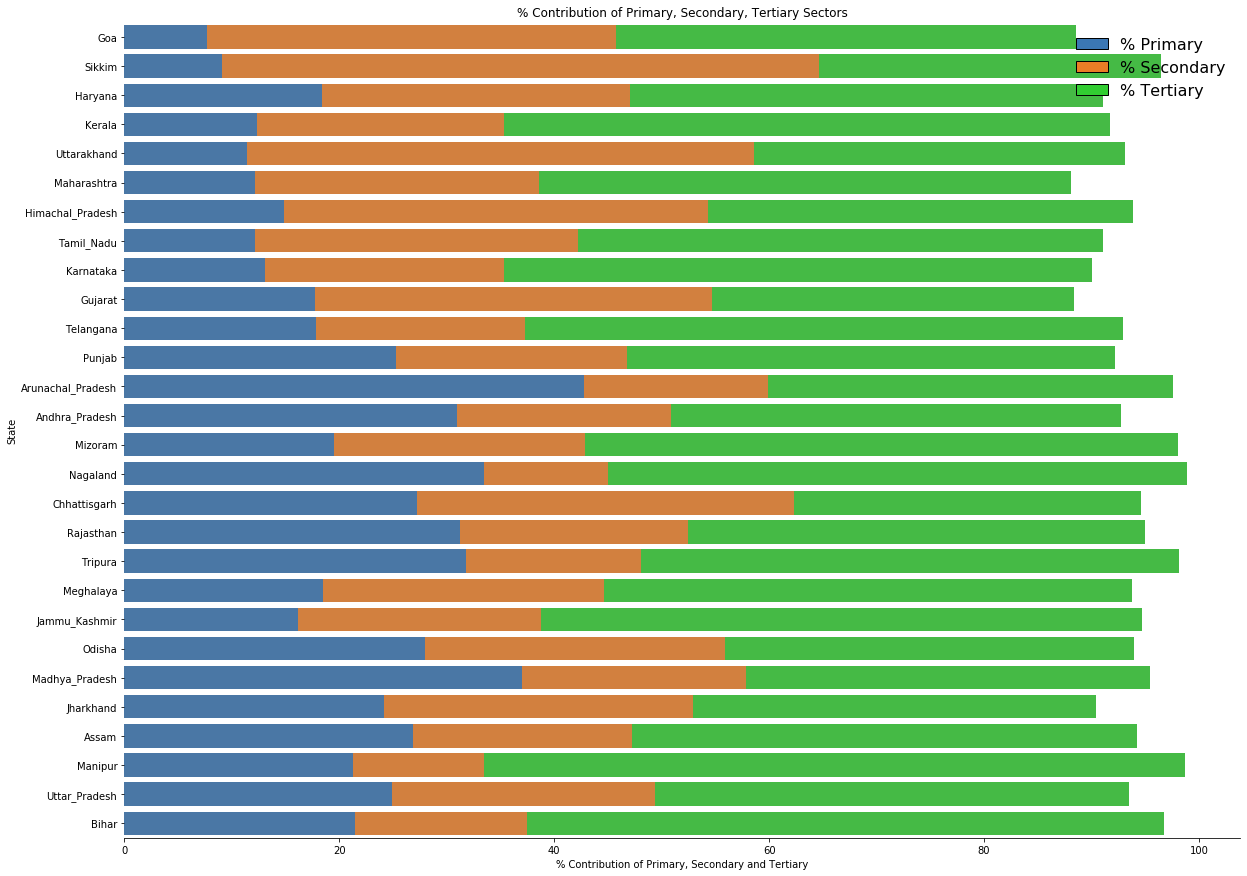

In [43]:
# set figure size for the plot
plt.figure(figsize=(20,15))

# calculate the % Total
final_df['% Total'] = final_df['% Primary'] + final_df['% Secondary'] + final_df['% Tertiary'] 

#Plot 1 - background - "% Total" (top) series
sns.barplot(y = final_df.State, x = final_df['% Total'], color='#32CD32')

# Calculate the sum of % Primary and % Secondary
primary_secondary_df = np.add(final_df['% Primary'],final_df['% Secondary'])

#Plot 2 - overlay - "Middle" series (% Primary + % Secondary)
middle_plot = sns.barplot(x = primary_secondary_df, y = final_df.State, color='#EB7D26')

#Plot 3 - overlay - "bottom" series (% Primary)
bottom_plot = sns.barplot(x = final_df['% Primary'], y = final_df.State, color = "#3B77B4")

# To show legends
topbar = plt.Rectangle((0,0),1,1,fc="#32CD32", edgecolor = 'black')
bottombar = plt.Rectangle((0,0),1,1,fc='#3B77B4',  edgecolor = 'black')
middlebar = plt.Rectangle((0,0),1,1,fc='#EB7D26',  edgecolor = 'black')
l = plt.legend([bottombar,middlebar, topbar], ['% Primary', '% Secondary', '% Tertiary'], loc=1, ncol = 1, prop={'size':16})
l.draw_frame(False)

# to remove the y axis line
sns.despine(left=True)

#set title
plt.title('% Contribution of Primary, Secondary, Tertiary Sectors')

# set x-axis lable
bottom_plot.set_xlabel("% Contribution of Primary, Secondary and Tertiary")

# show the plot
plt.show()

## Q3.2: Why is (Primary + Secondary + Tertiary) not equal to total GDP?

### Ans: Because Primary + Secondary + Tertiary constitute a total of TOTAL GSVA at basic prices. Total GDp = TOTAL GSVA at basic prices + Taxes on Products - Subsidies on products

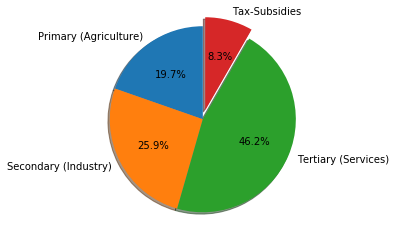

Total % Contibution by all sectors: 91.69999999999999
Total GDP %,: 100
Taxes: 11.04
Total % contribution by all sectors + tax: 102.73999999999998
Final contribution after deducting subsidies: 99.99999999999999


In [44]:
# lets verify this by plotting a pie chart
final_df['Taxes on Products'] = pd.to_numeric(final_df['Taxes on Products'])
final_df['Subsidies on products'] = pd.to_numeric(final_df['Subsidies on products'])
dd = final_df.loc[:,['State','Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Gross State Domestic Product']]

pri_per = round(100*(dd['Primary'].sum() / dd['Gross State Domestic Product'].sum()),2)
sec_per = round(100*(dd['Secondary'].sum() / dd['Gross State Domestic Product'].sum()),2)
ter_per = round(100*(dd['Tertiary'].sum() / dd['Gross State Domestic Product'].sum()),2)
tax_per = round(100*(dd['Taxes on Products'].sum() / dd['Gross State Domestic Product'].sum()),2)
sub_per = round(100*(dd['Subsidies on products'].sum() / dd['Gross State Domestic Product'].sum()),2)


# plot a pie chart to represent the contribution of all the sectors plus taxes - subsidies
labels = 'Primary (Agriculture)', 'Secondary (Industry)', 'Tertiary (Services)', 'Tax-Subsidies'
sizes = [pri_per, sec_per, ter_per, tax_per-sub_per]
explode = (0, 0, 0, 0.1)  # only "explode" the 4nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# also let's see mathematically
total_sector_per= pri_per+sec_per+ter_per

print('Total % Contibution by all sectors:', total_sector_per)
print('Total GDP %,:', 100)
print('Taxes:', tax_per)
print('Total % contribution by all sectors + tax:',total_sector_per +tax_per )
print('Final contribution after deducting subsidies:', total_sector_per +tax_per -sub_per)

In [45]:
# # by the below calculation it's proved why Primary+Sec+ter is not equal to the total GDP
# print('Pri+Sec+Ter+Tax-Subsidy:',dd['Primary'] + dd['Secondary'] +dd['Tertiary'] + dd['Taxes on Products'] - dd['Subsidies on products'])
# print('Total GSDP:', dd['Gross State Domestic Product'])

## Q3.3: Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

### Ans: percentile of state(% of states with lower per capita GDP) is negatively correlated with the % contribution of Primary sector to total GDP. This means that if the primary contibution increases, then the total gdp of all the states may go down.

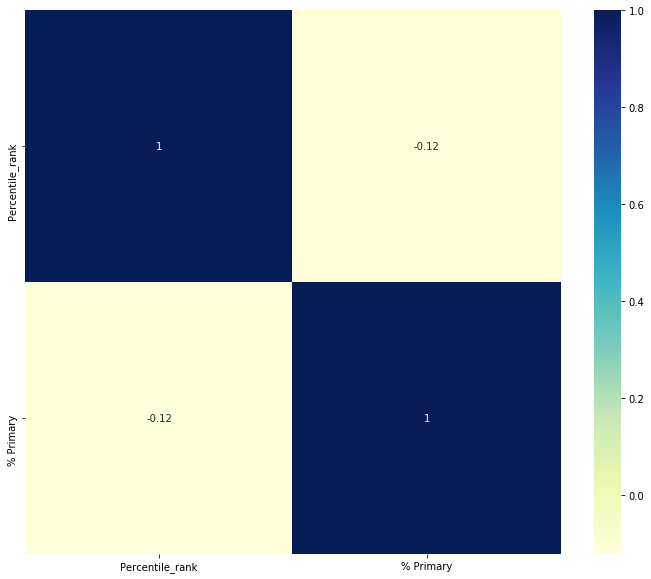

In [46]:
# create a new column with calculated percentile rank for each state based on GSDP
final_df['Percentile_rank'] = round(final_df['Gross State Domestic Product'].rank(pct=True),2)

# create new data frame that will contain only the required columns
corr_df = final_df.loc[:,['Percentile_rank','% Primary']]

# find correlation between percentile rank and % primary contribution
cor = corr_df.corr()

# create heatmap to visualize the correlation
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

# Q4: Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on./

In [47]:
# find the quantiles as mentioned in the question
l1,l2,l3,l4 = final_df['Per Capita GSDP (Rs.)'].quantile([0.2,0.5,0.85,1])

# create a 'Tag' column that will categorize the states based on the so-calculated quantile values
final_df['Tag'] = final_df['Per Capita GSDP (Rs.)'].apply(lambda x: 'C1' if x > int(l3) and x <= int(l4) else 'C2' if x > int(l2) and x <=int(l3) else 'C3' if x > int(l1) and x <= int(l2) else 'C4')

# Q5: For each category (C1, C2, C3, C4),
## Q 5.1: Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [48]:
# create new data frame to store the data related to C1 category
c1_df = final_df.loc[final_df['Tag'] == 'C1']

# drop irrrelavant columns such as sectors (Primary, secondary, tertiary),etc. Keep only state, GSDP and sub-sectors
cols_to_drp = ['Primary', 'Secondary', 'Tertiary', '% Primary', '% Secondary', '% Tertiary','% Total', 'Tag', 'Percentile_rank', 'Per Capita GSDP (Rs.)', 'Population (\'00)','Taxes on Products','TOTAL GSVA at basic prices', 'Subsidies on products', 'State']

# drop the columns
c1_df = c1_df.drop(cols_to_drp,axis=1)

# calculate Total GDP of C1 category
c1_gdp = c1_df['Gross State Domestic Product'].sum()

# drop GDP column
c1_df = c1_df.drop('Gross State Domestic Product',axis=1)

# initialize empty list to store the % contributions of each sub-sector
contribution_list = []

# loop over the columns of data frame
for col in c1_df.columns:
    
    # convert the col type from object to numeric
    c1_df[col] = pd.to_numeric(c1_df[col])
    
    #calculate the % contribution of a particular sub-sector to total GSDP for the category
    contribution_list.append(round(100*(c1_df[col].sum() / c1_gdp),2))

# Transpose the remaining data frame
c1_df = c1_df.T

# create new column to store the % contribution
c1_df['% Contribution'] = contribution_list

# sort the data frame based on % contribution
c1_df = c1_df.sort_values(by='% Contribution',ascending=False)

# index all the sub-sectors where contribution is <=80%
c1_80_df = c1_df.loc[c1_df['% Contribution'].cumsum() <= 80]

In [49]:
# get top 3 and 4 and 5 sub-sectors
c1_top_3 = c1_80_df.head(3)
c1_top_4 = c1_80_df.head(4)
c1_top_5 = c1_80_df.head(5)

In [50]:
c1_top_3['% Contribution'].sum()

43.47

In [51]:
c1_top_4['% Contribution'].sum()

56.65

In [52]:
c1_top_5['% Contribution'].sum()

67.32

### ANS: For C1 category:
- The contribution of Top 5 sub-sectors is 67.32 %, which is the closest to 80% when compared with top 3 and 4 for C1 category

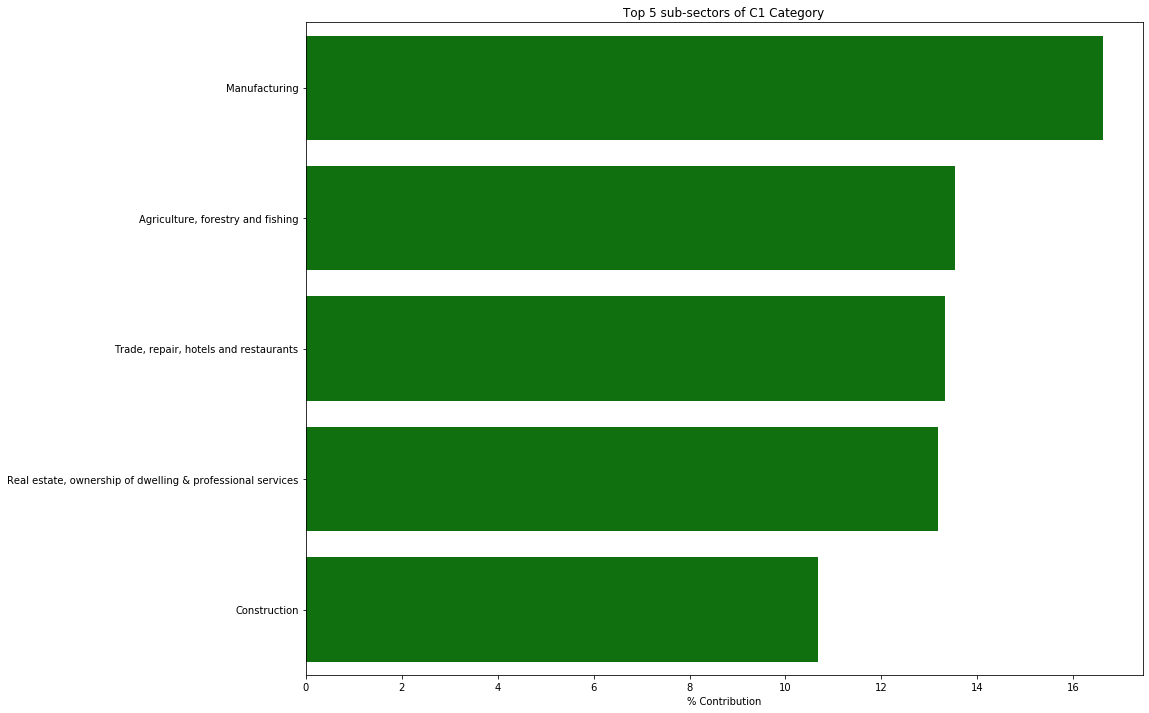

In [53]:
plt.figure(figsize=(15,12))
plt.title("Top 5 sub-sectors of C1 Category")
sns.barplot(x=c1_top_5['% Contribution'], y=c1_top_5.index, color='green')
plt.show()

In [54]:
# create new data frame to store the data related to C2 category
c2_df = final_df.loc[final_df['Tag'] == 'C2']

# drop irrrelavant columns such as sectors (Primary, secondary, tertiary),etc. Keep only state, GSDP and sub-sectors
cols_to_drp = ['Primary', 'Secondary', 'Tertiary', '% Primary', '% Secondary', '% Tertiary','% Total', 'Tag', 'Percentile_rank', 'Per Capita GSDP (Rs.)', 'Population (\'00)','Taxes on Products','TOTAL GSVA at basic prices', 'Subsidies on products', 'State']

# drop the columns
c2_df = c2_df.drop(cols_to_drp,axis=1)

# calculate Total GDP of C2 category
c2_gdp = c2_df['Gross State Domestic Product'].sum()

# drop GDP column
c2_df = c2_df.drop('Gross State Domestic Product',axis=1)

# initialize empty list to store the % contributions of each sub-sector
contribution_list = []

# loop over the columns of data frame
for col in c2_df.columns:
    
    # convert the col type from object to numeric
    c2_df[col] = pd.to_numeric(c2_df[col])
    
    #calculate the % contribution of a particular sub-sector to total GSDP for the category
    contribution_list.append(round(100*(c2_df[col].sum() / c2_gdp),2))

# Transpose the remaining data frame
c2_df = c2_df.T

# create new column to store the % contribution
c2_df['% Contribution'] = contribution_list

# sort the data frame based on % contribution
c2_df = c2_df.sort_values(by='% Contribution',ascending=False)

# index all the sub-sectors where contribution is <=80%
c2_80_df = c2_df.loc[c2_df['% Contribution'].cumsum() <= 80]

In [55]:
# get top 3 and 4 and 5 sub-sectors
c2_top_3 = c2_80_df.head(3)
c2_top_4 = c2_80_df.head(4)
c2_top_5 = c2_80_df.head(5)

In [56]:
c2_top_3['% Contribution'].sum()

46.900000000000006

In [57]:
c2_top_4['% Contribution'].sum()

57.13000000000001

In [58]:
c2_top_5['% Contribution'].sum()

64.19000000000001

### ANS: For C2 category:
- Contribution of Top 5 sub-sectors is 64.1 %, which is the closest to 80% when compared with top 3 and 4 for C2 category

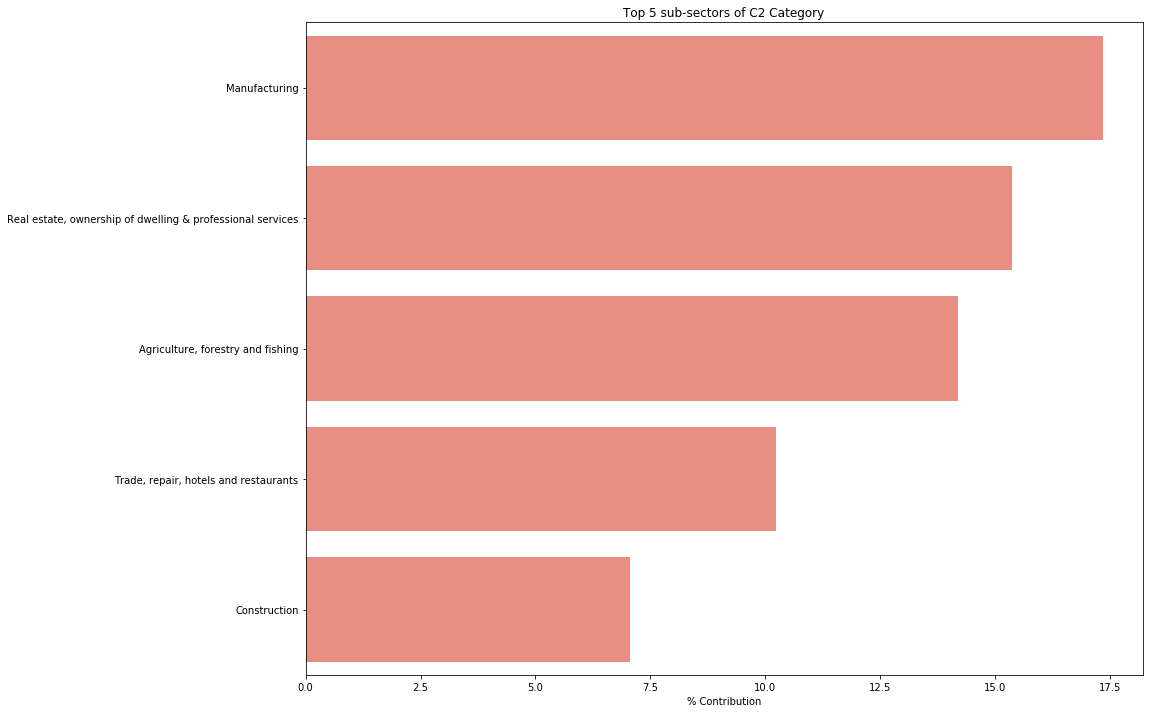

In [59]:
plt.figure(figsize=(15,12))
plt.title("Top 5 sub-sectors of C2 Category")
sns.barplot(x=c2_top_5['% Contribution'], y=c2_top_5.index, color='salmon')
plt.show()

In [60]:
# create new data frame to store the data related to C3 category
c3_df = final_df.loc[final_df['Tag'] == 'C3']

# drop irrrelavant columns such as sectors (Primary, secondary, tertiary),etc. Keep only state, GSDP and sub-sectors
cols_to_drp = ['Primary', 'Secondary', 'Tertiary', '% Primary', '% Secondary', '% Tertiary','% Total', 'Tag', 'Percentile_rank', 'Per Capita GSDP (Rs.)', 'Population (\'00)','Taxes on Products','TOTAL GSVA at basic prices', 'Subsidies on products', 'State']

# drop the columns
c3_df = c3_df.drop(cols_to_drp,axis=1)

# calculate Total GDP of C3 category
c3_gdp = c3_df['Gross State Domestic Product'].sum()

# drop GDP column
c3_df = c3_df.drop('Gross State Domestic Product',axis=1)

# initialize empty list to store the % contributions of each sub-sector
contribution_list = []

# loop over the columns of data frame
for col in c3_df.columns:
    
    # convert the col type from object to numeric
    c3_df[col] = pd.to_numeric(c3_df[col])
    
    #calculate the % contribution of a particular sub-sector to total GSDP for the category
    contribution_list.append(round(100*(c3_df[col].sum() / c3_gdp),2))

# Transpose the remaining data frame
c3_df = c3_df.T

# create new column to store the % contribution
c3_df['% Contribution'] = contribution_list

# sort the data frame based on % contribution
c3_df = c3_df.sort_values(by='% Contribution',ascending=False)

# index all the sub-sectors where contribution is <=80%
c3_80_df = c3_df.loc[c3_df['% Contribution'].cumsum() <= 80]

In [61]:
# get top 3 and 4 and 5 sub-sectors
c3_top_3 = c3_80_df.head(3)
c3_top_4 = c3_80_df.head(4)
c3_top_5 = c3_80_df.head(5)

In [62]:
c3_top_3['% Contribution'].sum()

45.18000000000001

In [63]:
c3_top_4['% Contribution'].sum()

54.900000000000006

In [64]:
c3_top_5['% Contribution'].sum()

63.64000000000001

### ANS: For C3 category:
- Contribution of Top 5 sub-sectors is 63.64 %, which is the closest to 80% when compared with top 3 and 4 for c3 category

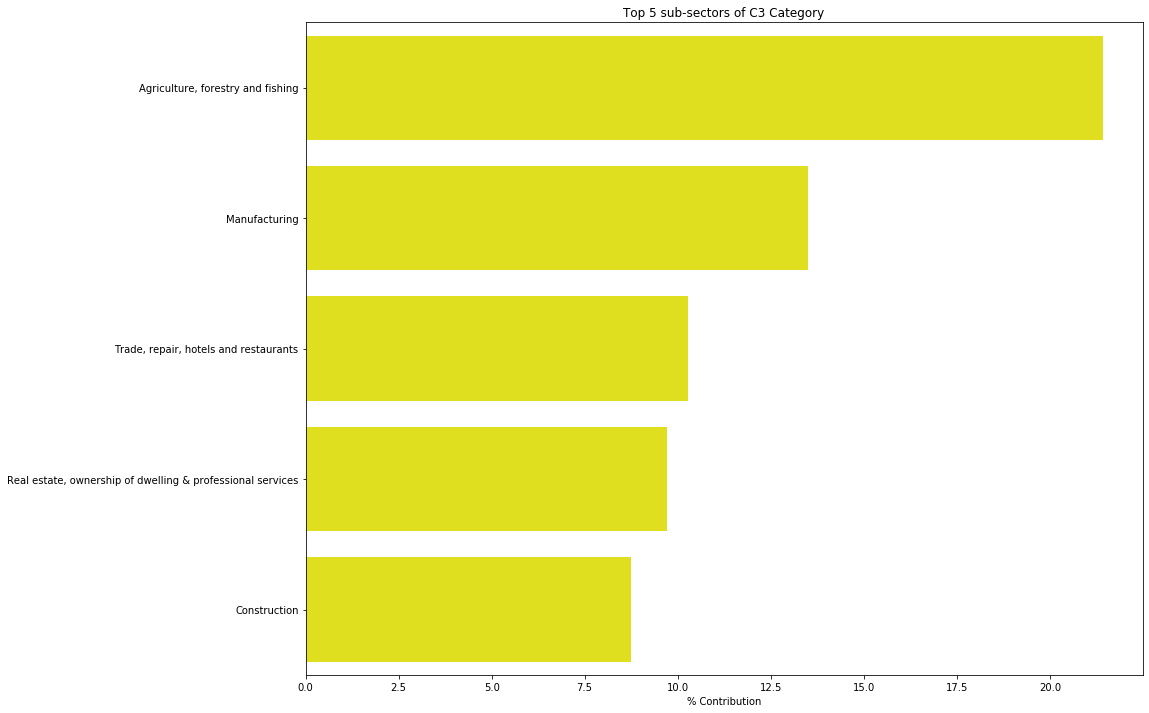

In [65]:
plt.figure(figsize=(15,12))
plt.title("Top 5 sub-sectors of C3 Category")
sns.barplot(x=c3_top_5['% Contribution'], y=c3_top_5.index, color='yellow')
plt.show()

In [66]:
# create new data frame to store the data related to C4 category
c4_df = final_df.loc[final_df['Tag'] == 'C4']

# drop irrrelavant columns such as sectors (Primary, secondary, tertiary),etc. Keep only state, GSDP and sub-sectors
cols_to_drp = ['Primary', 'Secondary', 'Tertiary', '% Primary', '% Secondary', '% Tertiary','% Total', 'Tag', 'Percentile_rank', 'Per Capita GSDP (Rs.)', 'Population (\'00)','Taxes on Products','TOTAL GSVA at basic prices', 'Subsidies on products', 'State']

# drop the columns
c4_df = c4_df.drop(cols_to_drp,axis=1)

# calculate Total GDP of C4 category
c4_gdp = c4_df['Gross State Domestic Product'].sum()

# drop GDP column
c4_df = c4_df.drop('Gross State Domestic Product',axis=1)

# initialize empty list to store the % contributions of each sub-sector
contribution_list = []

# loop over the columns of data frame
for col in c4_df.columns:
    
    # convert the col type from object to numeric
    c4_df[col] = pd.to_numeric(c4_df[col])
    
    #calculate the % contribution of a particular sub-sector to total GSDP for the category
    contribution_list.append(round(100*(c4_df[col].sum() / c4_gdp),2))

# Transpose the remaining data frame
c4_df = c4_df.T

# create new column to store the % contribution
c4_df['% Contribution'] = contribution_list

# sort the data frame based on % contribution
c4_df = c4_df.sort_values(by='% Contribution',ascending=False)

# index all the sub-sectors where contribution is <=80%
c4_80_df = c4_df.loc[c4_df['% Contribution'].cumsum() <= 80]

In [67]:
# get top 3 and 4 and 5 sub-sectors
c4_top_3 = c4_80_df.head(3)
c4_top_4 = c4_80_df.head(4)
c4_top_5 = c4_80_df.head(5)

In [68]:
c4_top_3['% Contribution'].sum()

46.68

In [69]:
c4_top_4['% Contribution'].sum()

56.980000000000004

In [70]:
c4_top_5['% Contribution'].sum()

66.68

### ANS: For C4 category:
- Contribution of Top 5 sub-sectors is 66.68 %, which is the closest to 80% when compared with top 3 and 4 for c4 category

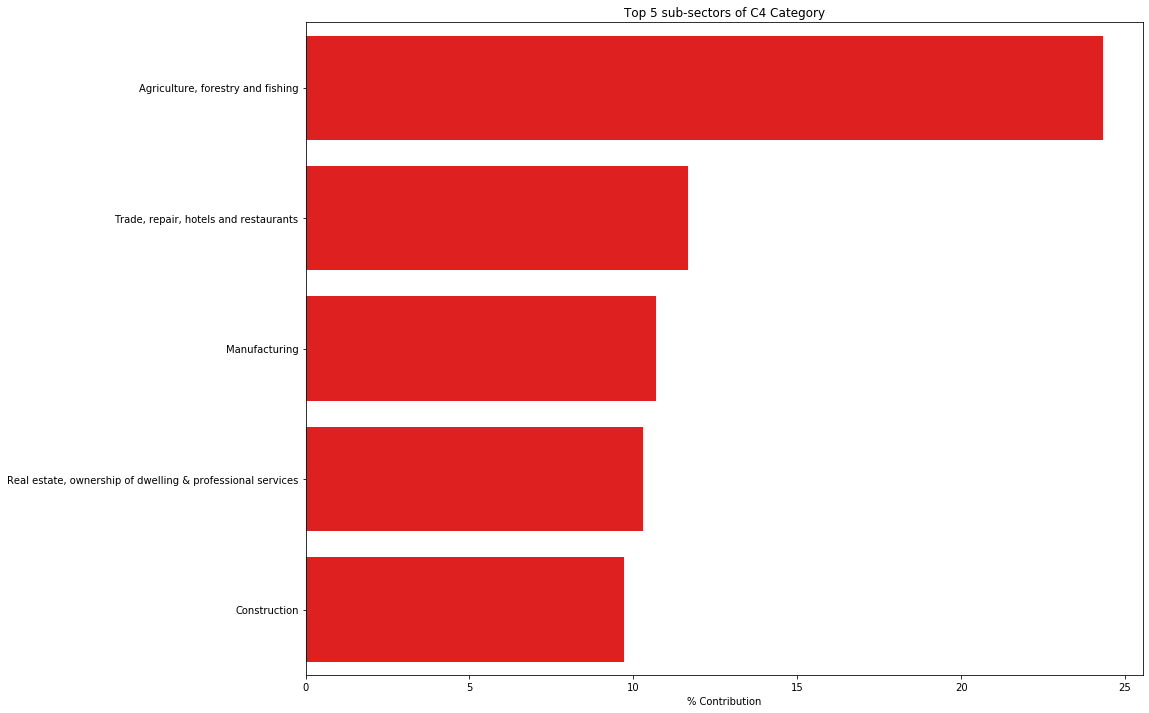

In [71]:
plt.figure(figsize=(15,12))
plt.title("Top 5 sub-sectors of C4 Category")
sns.barplot(x=c4_top_5['% Contribution'], y=c4_top_5.index, color='red')
plt.show()

## Q5.2: Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

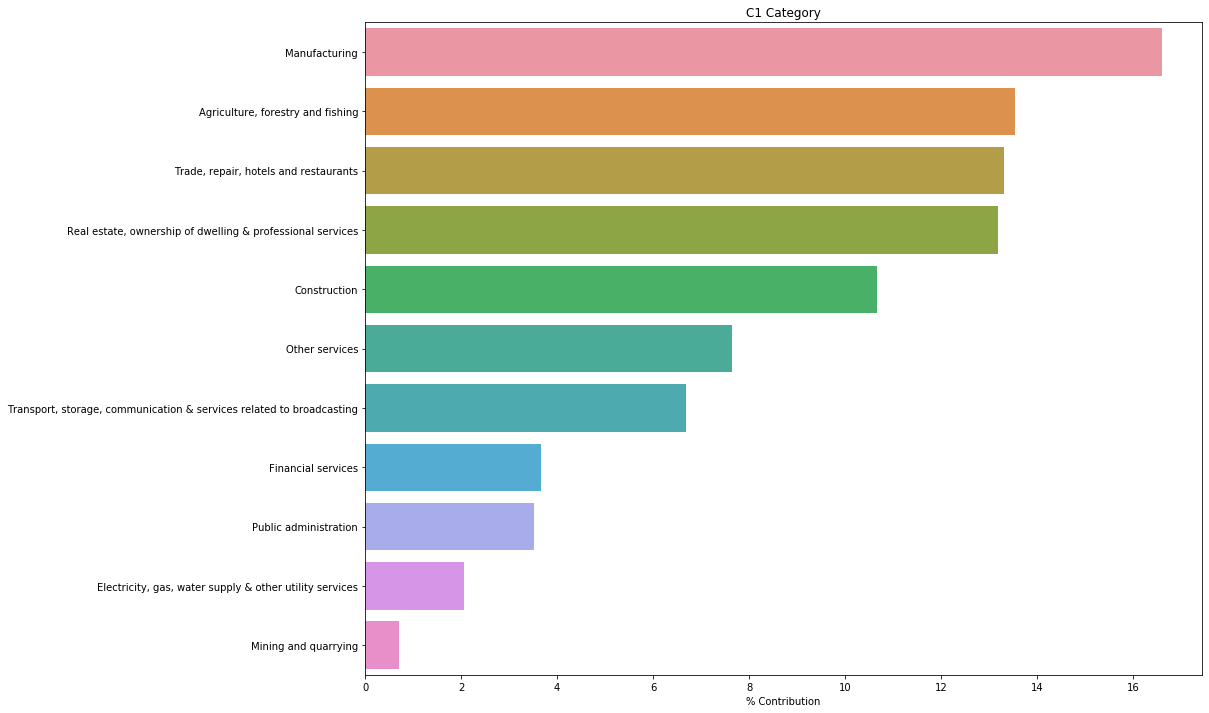

In [72]:
# bar plot for Category C1 as % Contribution to total GSDp
plt.figure(figsize=(15,12))
plt.title("C1 Category")
sns.barplot(x=c1_df['% Contribution'], y=c1_df.index)
plt.show()

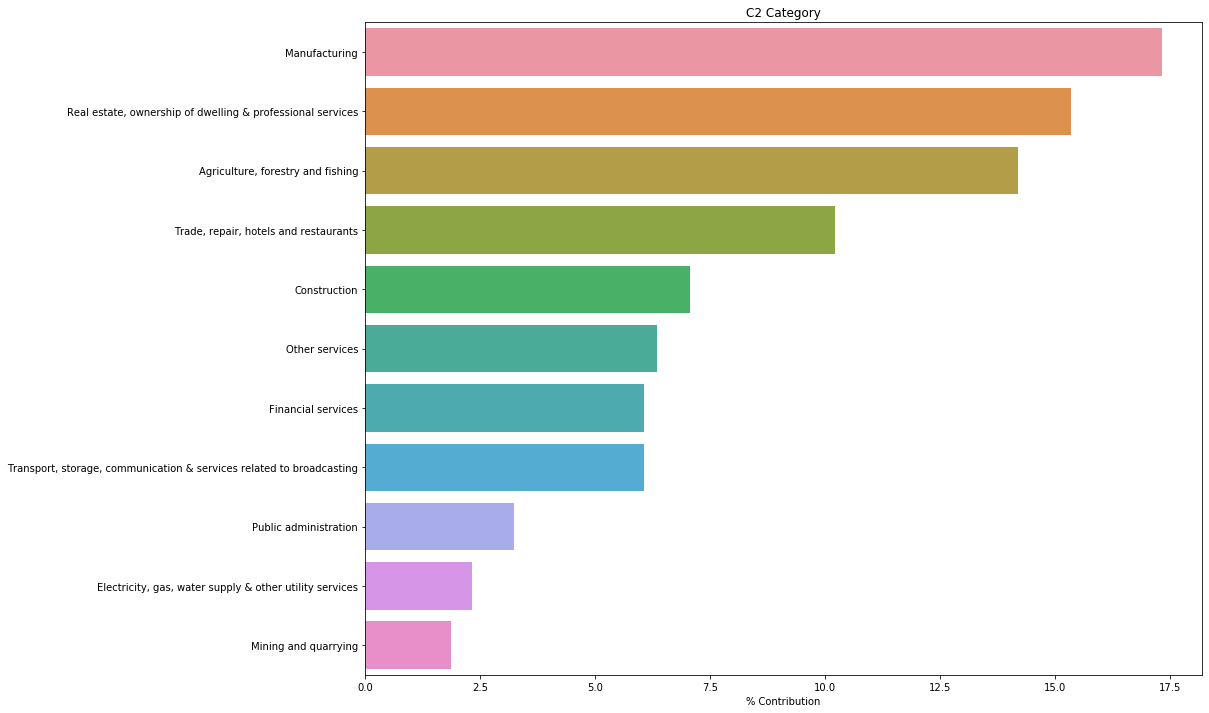

In [73]:
# bar plot for Category C2 as % Contribution to total GSDp
plt.figure(figsize=(15,12))
plt.title("C2 Category")
sns.barplot(x=c2_df['% Contribution'], y=c2_df.index)
plt.show()

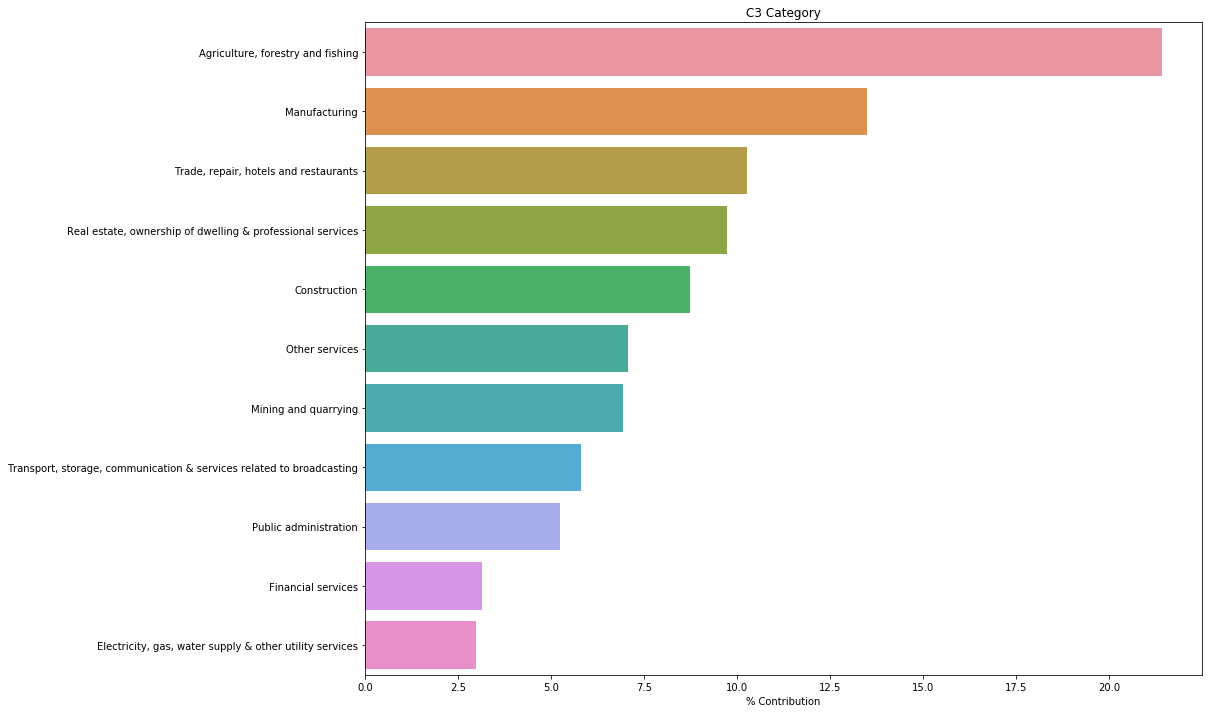

In [74]:
# bar plot for Category C3 as % Contribution to total GSDp
plt.figure(figsize=(15,12))
plt.title("C3 Category")
sns.barplot(x=c3_df['% Contribution'], y=c3_df.index)
plt.show()

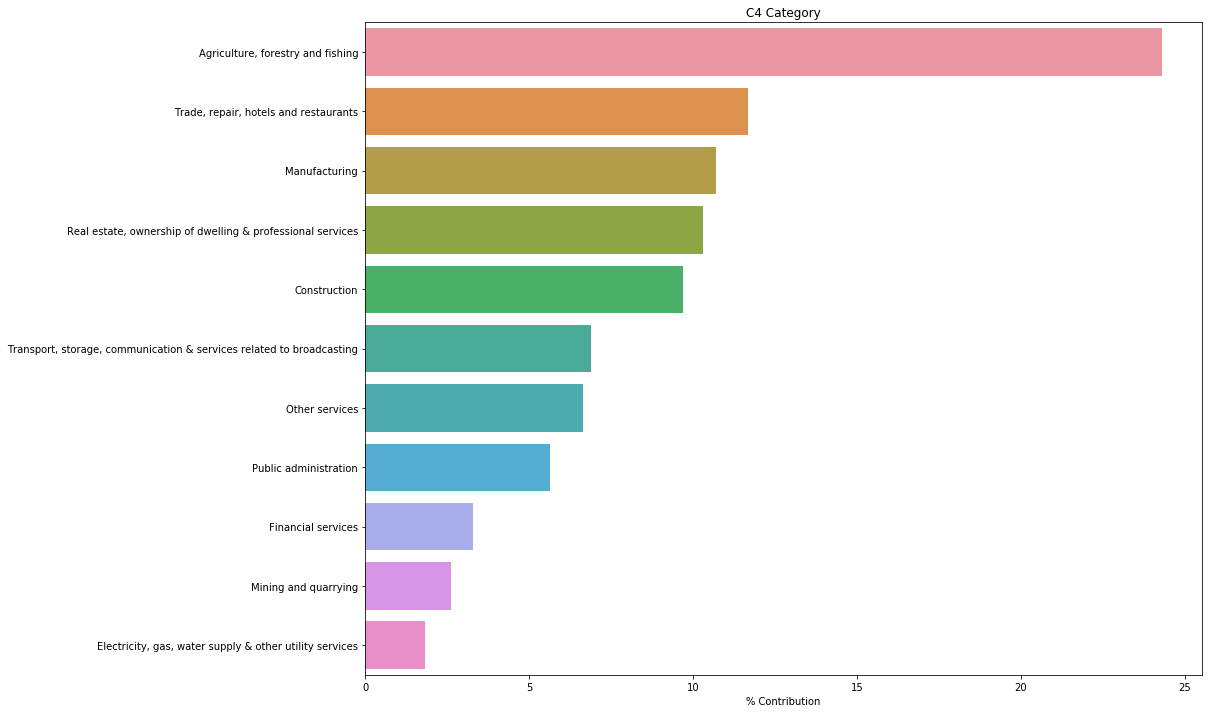

In [75]:
# bar plot for Category C4 as % Contribution to total GSDp
plt.figure(figsize=(15,12))
plt.title("C4 Category")
sns.barplot(x=c4_df['% Contribution'], y=c4_df.index)
plt.show()

## Q5.3: How does the GDP distribution of the top states (C1) differ from the others?

## Ans: Even though the top states (C1) have the percentile from 85th to 100th w.r.t to the per capita GDP, the overall GDP distribution is very less(that is the median) when compared to the C2 and C4 states, and marginally higher than C3 states.  The below box plot shows such distribution

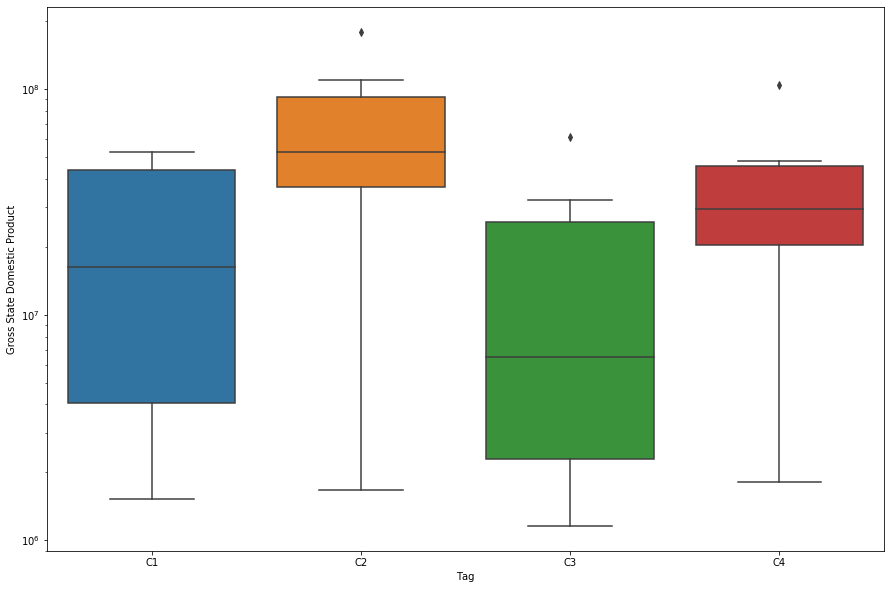

In [76]:
# create box plot to show the distribution
plt.figure(figsize=(15,10))
plt.yscale('log')
sns.boxplot(x='Tag', y ='Gross State Domestic Product', data=final_df)
plt.show()

#### Also, from the below table it can be noticed that C1 states have the lowest GSDP when compared to other categories, such as C2, C3 and C4

In [77]:
# ccreate a pivot table to get the summation of GSDP across all the 4 categories
final_df.pivot_table(index='Tag', values='Gross State Domestic Product', aggfunc=sum)

,Gross State Domestic Product
Tag,
C1,118129206
C2,622828765
C3,135359991
C4,233252066


## Q5.4: Which sub-sectors seem to be correlated with high GDP?

### Ans: Agriculture, forestry and fishing sub-sectors seems to be correlated with the high GDP. It can be seen in the below bar plot and pivot table

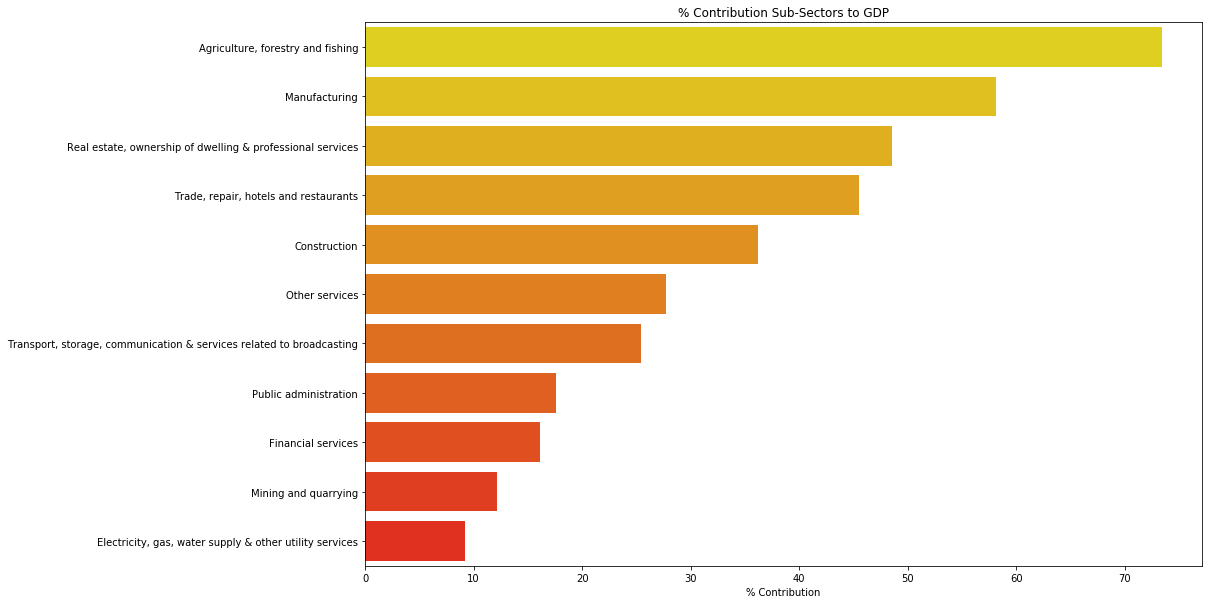

,% Contribution
"Agriculture, forestry and fishing",73.48
Manufacturing,58.13
"Real estate, ownership of dwelling & professional services",48.56
"Trade, repair, hotels and restaurants",45.49
Construction,36.17
Other services,27.70
"Transport, storage, communication & services related to broadcasting",25.44
Public administration,17.63
Financial services,16.14
Mining and quarrying,12.11


In [78]:
# Concat all the 4 category data frames into one data frame
c1_df['Category'] = 'C1'
c1_temp_df = c1_df.loc[:,['% Contribution', 'Category']]

c2_df['Category'] = 'C2'
c2_temp_df = c2_df.loc[:,['% Contribution', 'Category']]

c3_df['Category'] = 'C3'
c3_temp_df = c3_df.loc[:,['% Contribution', 'Category']]

c4_df['Category'] = 'C4'
c4_temp_df = c4_df.loc[:,['% Contribution', 'Category']]

# concatenated data frame, that contains all the 4 categories data
c1_c4_df = pd.concat([c1_temp_df,c2_temp_df,c3_temp_df,c4_temp_df])

# create pivot table to store the sum of % contribution accross sub-sectors
c1_c4_pivot_df = c1_c4_df.pivot_table(index=c1_c4_df.index, values='% Contribution', aggfunc=sum)

# sort the pivot data frame
c1_c4_pivot_df = c1_c4_pivot_df.sort_values(by='% Contribution',ascending=False)

# plot the bar graph to visualize which sub-sector is correrated with the high GDP for all the states.
plt.figure(figsize=(15,10))
plt.title('% Contribution Sub-Sectors to GDP')
sns.barplot(y=c1_c4_pivot_df.index, x=c1_c4_pivot_df['% Contribution'], palette='autumn_r')
plt.show()

# Also, the pivot table data frame for table visualization
c1_c4_pivot_df

## Q5.5: Which sub-sectors do the various categories need to focus on? 

## ANS: by the above created bar plot and plots created previously each for C1, C2,C3,and C4 states, it's clear that 'Electricity, gas, water supply & other utility services' needs the most focus on. 
- ## Following is the 'Mining and quarrying' and 'Financial Services'

## Q5.6: Finally, provide at least two recommendations for each category to improve the per capita GDP.

In [79]:
# create a pivot table based on PEr Capita GSDP in each category 
final_per_capita_pivot_df = final_df.pivot_table(index='Tag', values='Per Capita GSDP (Rs.)', aggfunc=sum)

# sort the pivot table in decreasing order of Per Capita GSDP
final_per_capita_pivot_df= final_per_capita_pivot_df.sort_values(by='Per Capita GSDP (Rs.)', ascending=False)

# change the data type of column 'Population'
final_df['Population (\'00)'] = pd.to_numeric(final_df['Population (\'00)'])

# create a pivot table based on Population in each category
final_population_pivot_df = final_df.pivot_table(index='Tag', values='Population (\'00)')

# sort the pivot table in decreasing order of Population
final_population_pivot_df = final_population_pivot_df.sort_values(by='Population (\'00)', ascending=False)

# check the per capita pivot table
final_per_capita_pivot_df

,Per Capita GSDP (Rs.)
Tag,
C2,1216426.0
C1,983998.0
C3,662396.0
C4,327547.0


In [80]:
# check the population pivot table
final_population_pivot_df

,Population ('00)
Tag,
C4,780612.166667
C2,492494.777778
C3,207812.875000
C1,146712.600000


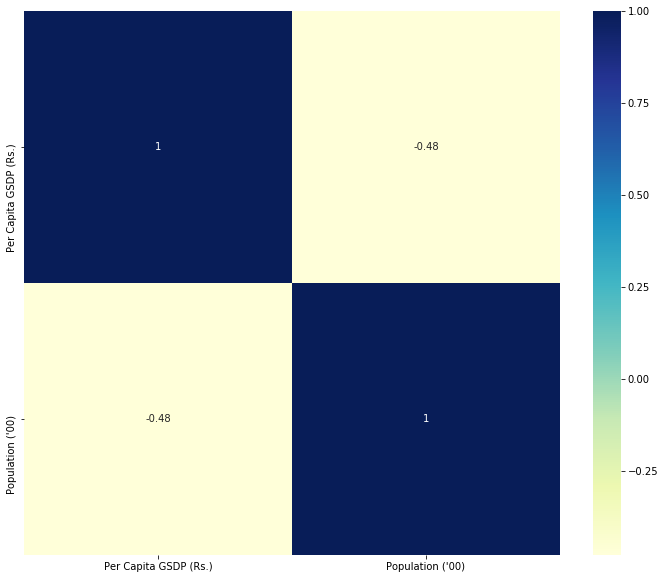

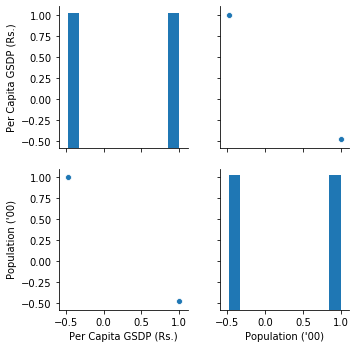

,Per Capita GSDP (Rs.),Population ('00)
Per Capita GSDP (Rs.),1.00000,-0.47741
Population ('00),-0.47741,1.00000


In [81]:
# concat both the data frames into one horizontally
per_capita_pop_df = pd.concat([final_per_capita_pivot_df, final_population_pivot_df],axis=1, sort=False)

# find correlation
cor = per_capita_pop_df.corr()

# plot heat map
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

# plt a pair plot also, to see the decreasing trend
sns.pairplot(cor)
plt.show()

# display the corr table
cor

## Recommendations:
As it can be seen from the heat map, the correlation between the GSDP per capita and population is negative. Major recommendation would be to control population across all the Categories.

### C1:
- #### Even though the population is very low, sub-sectors such as 'Mining' needs to be improved to a huge amount to make a  better impact on the GSDP per capita
- #### This category is considered to be the top percentile ranked based on Per capita GSDP, still overall the impact on the total GDP is not good. If all the bottom 5 sub-categories can be improved the per capita GSDP along with the impact on total GDP will tremendously increase

### C2:
- #### Restricting population here will help in increasing per Capita GSDP
- #### Minign and electricy sub-sectors need to be focussed on.

### C3:
- #### Improving 'Transport, storage, communication & services related to broadcasting' sub-sector. With proper telecommunication it is possible to massively expand the per capita GSDP 
- #### Improving the 'Financial Services' sub-sector. More and more exports leads to more foreign currency in India. This will help increase the per capita GSDP 

### C4:
- #### Restrict population, since this Category has the hightest population, which affects the Per capita GSDP
- #### Improving the sub-sector of Electricity, Gas, water supply can help in improving Per Capita GSDP

# Part-II: GDP and Education Dropout Rates

## Part-II: GDP and Education

# Q1: Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

## Ans: There is a negative correlatioin between the GDP per capita with drop out rates in education(primary, upper primary and secondary). For all the education sectors the correlation is negative.. i.e, more the GSDP per capital, less the drop out rates and vice versa.
___Below visualization of scatter plot with BEST-FIT line incates the same___

In [82]:
# load the data file into a Data Frame required for Part II
path = r'C:\Users\akshay.nasarpuri\Documents\Jupyter\Data_Assignment\Part_II_Data'
file = glob.glob(path + '/*.csv')

# read the file and create a data frame for dropout_df out rates
dropout_df = pd.read_csv(file[0])

# check data frame attributes
print(dropout_df.shape)
print(dropout_df.info())

(37, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
Sl. No.                         37 non-null object
Level of Education - State      37 non-null object
Primary - 2012-2013             29 non-null float64
Primary - 2014-2015             33 non-null float64
Primary - 2014-2015.1           31 non-null float64
Upper Primary - 2012-2013       31 non-null float64
Upper Primary - 2013-2014       35 non-null float64
Upper Primary - 2014-2015       35 non-null float64
Secondary - 2012-2013           34 non-null float64
Secondary - 2013-2014           36 non-null float64
Secondary - 2014-2015           36 non-null float64
Senior Secondary - 2012-2013    24 non-null float64
Senior Secondary - 2013-2014    27 non-null float64
Senior Secondary - 2014-2015    28 non-null float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB
None


In [83]:
# filter out the required data
dropout_df = dropout_df.loc[:, ['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']] 

# drop the union territories---
# Create a list of Union Terretories
union_terretories_list = ['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','Puducherry']

# remove the rows where state is a Union Territory
for ut in union_terretories_list:
    dropout_df = dropout_df[~(dropout_df['Level of Education - State'] == ut)]
        
# changing cols with rename() 
dropout_df = dropout_df.rename(columns = {'Level of Education - State': "State"})    

# before mereging, there are discrepencies in the name of the states. Resolving them first
# Create a dictionary using which we 
# will remap the values 
rep_dict = {'Andhra Pradesh' : 'Andhra_Pradesh', 'Arunachal Pradesh' : 'Arunachal_Pradesh', 'Chhatisgarh' : 'Chhattisgarh', 'Himachal Pradesh' : 'Himachal_Pradesh', 'Jammu and Kashmir':'Jammu_Kashmir','Madhya Pradesh':'Madhya_Pradesh','Tamil Nadu':'Tamil_Nadu', 'Uttar Pradesh':'Uttar_Pradesh','Uttrakhand':'Uttarakhand'} 
  
# Remap the values of the dropout dataframe 
dropout_df.replace({"State": rep_dict}, inplace=True) 

# merge the data set obtained from Part I-b to the drop out data set obtained from PArt II
dropout_final_df = pd.merge(final_df,dropout_df, how='inner', on='State')

# changing the data type of the below columns, so that plotting correlation is possible
dropout_final_df['Primary - 2014-2015'] = pd.to_numeric(dropout_final_df['Primary - 2014-2015'])
dropout_final_df['Per Capita GSDP (Rs.)'] = pd.to_numeric(dropout_final_df['Per Capita GSDP (Rs.)'])

In [84]:
# check for null values across columns
dropout_final_df.isnull().sum()

Agriculture, forestry and fishing                                       0
Mining and quarrying                                                    1
Primary                                                                 0
Manufacturing                                                           1
Electricity, gas, water supply & other utility services                 1
Construction                                                            1
Secondary                                                               0
Trade, repair, hotels and restaurants                                   1
Transport, storage, communication & services related to broadcasting    1
Financial services                                                      1
Real estate, ownership of dwelling & professional services              1
Public administration                                                   1
Other services                                                          1
Tertiary                              

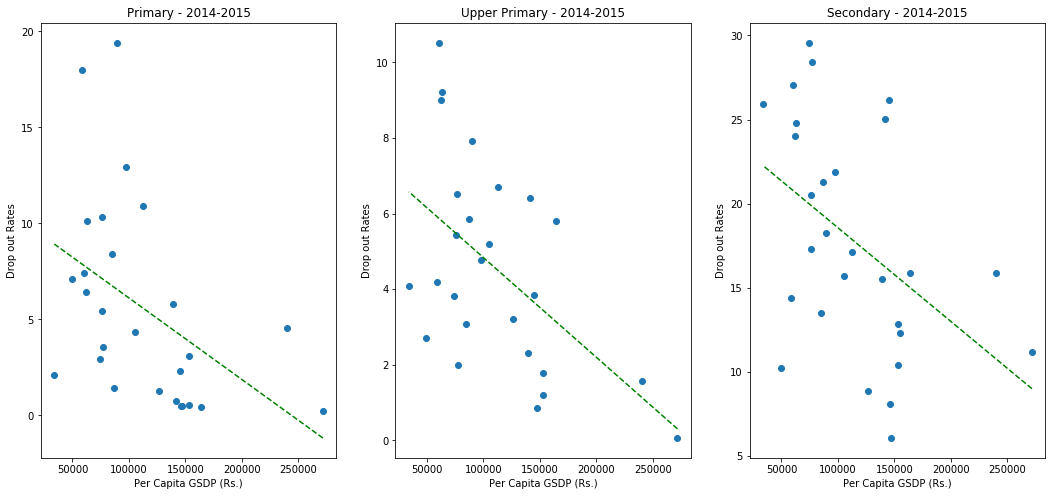

In [85]:
plt.figure(figsize=(18,8))

corr_to_plot_list = ['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']

cnt=1

for col in corr_to_plot_list:
    # creating subplots with 1 row and 3 columns since there are 3 drop out rates that need to be analysed
    plt.subplot(1,3,cnt)

    # Since drop out rates in education columns have NaNs in them, 'cleaning them up" by only considering the indexes that are finite.
    idx = np.isfinite(dropout_final_df['Per Capita GSDP (Rs.)']) & np.isfinite(dropout_final_df[col])

    # setting plot attributes
    plt.title(col)
    plt.xlabel('Per Capita GSDP (Rs.)')
    plt.ylabel('Drop out Rates')

    # plotting the scatter plot
    plt.scatter(x='Per Capita GSDP (Rs.)', y=col, data=dropout_final_df)

    # generating the BEST-FIT line by calculating the m and c values of the eq y=mx+c of linear line
    m,c = np.polyfit(dropout_final_df['Per Capita GSDP (Rs.)'][idx], dropout_final_df[col][idx], 1)

    #plotting the graph
    plt.plot(dropout_final_df['Per Capita GSDP (Rs.)'], m*dropout_final_df['Per Capita GSDP (Rs.)'] + c, '--g')

    cnt+=1
    
plt.show()    

## Q1.1 Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

## ANS:

- ## Primary Education :
    -  __% Primary Contribution to total GDP:__ There is a __POSITIVE__ Correlation, ie. as the % contribution of Primary Sub-sector to __total GDP increases__ the drop out rates in __Primary Education also increases__.
    - __% Secondary Contribution to total GDP:__ There is a __NEGATIVE__ Correlation, ie. as the % contribution of Secondary Sub-sector to __total GDP increases__ the drop out rates in __Primary Education also decreases__.
    - __% Tertiary Contribution to total GDP:__ There is a __POSITIVE__ Correlation, ie. as the % contribution of Tertiary Sub-sector to __total GDP increases__ the drop out rates in __Primary Education also increases__.
    
- ## Upper Primary Education :
    -  __% Primary Contribution to total GDP:__ There is a __POSITIVE__ Correlation, ie. as the % contribution of Primary Sub-sector to __total GDP increases__ the drop out rates in __Upper Primary Education also increases__.
    - __% Secondary Contribution to total GDP:__ There is a __NEGATIVE__ Correlation, ie. as the % contribution of Secondary Sub-sector to __total GDP increases__ the drop out rates in __Upper Primary Education also decreases__.
    - __% Tertiary Contribution to total GDP:__ There is a __ZERO__ Correlation, ie. as the % contribution of Tertiary Sub-sector to __total GDP increases or decreases__ the drop out rates in __Upper Primary Education remains unaffected__.    
    
    
- ## Secondary Education :
    -  __% Primary Contribution to total GDP:__ There is a __POSITIVE__ Correlation, ie. as the % contribution of Primary Sub-sector to __total GDP increases__ the drop out rates in __Secondary Education also increases__.
    - __% Secondary Contribution to total GDP:__ There is a __NEGATIVE__ Correlation, ie. as the % contribution of Secondary Sub-sector to __total GDP increases__ the drop out rates in __Secondary Education also decreases__.
    - __% Tertiary Contribution to total GDP:__ There is a __ZERO__ Correlation, ie. as the % contribution of Tertiary Sub-sector to __total GDP increases or decreases__ the drop out rates in __Secondary Education remains unaffected__.      

In [86]:
dropout_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 30 columns):
Agriculture, forestry and fishing                                       28 non-null object
Mining and quarrying                                                    27 non-null object
Primary                                                                 28 non-null int64
Manufacturing                                                           27 non-null object
Electricity, gas, water supply & other utility services                 27 non-null object
Construction                                                            27 non-null object
Secondary                                                               28 non-null int64
Trade, repair, hotels and restaurants                                   27 non-null object
Transport, storage, communication & services related to broadcasting    27 non-null object
Financial services                                                      27 non-n

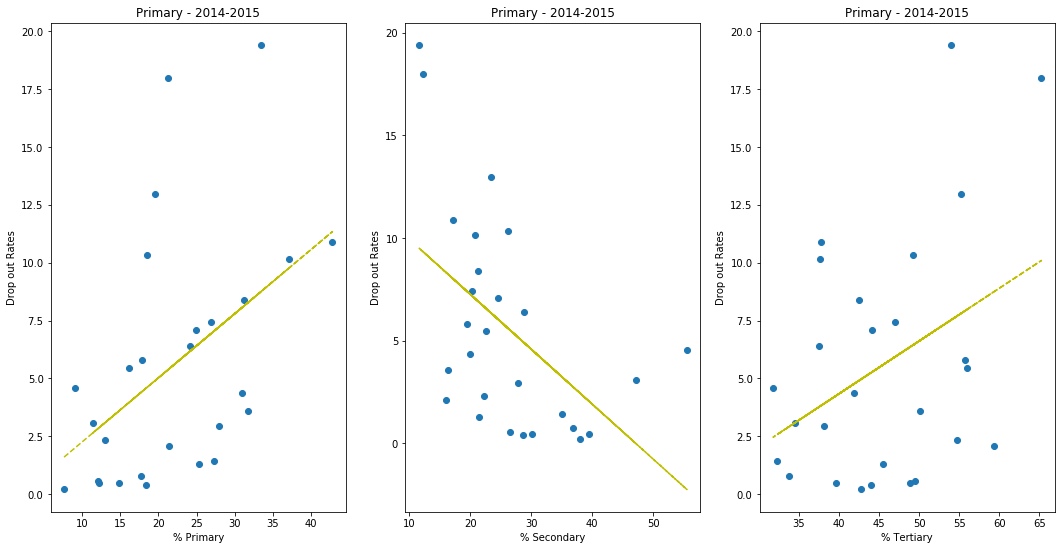

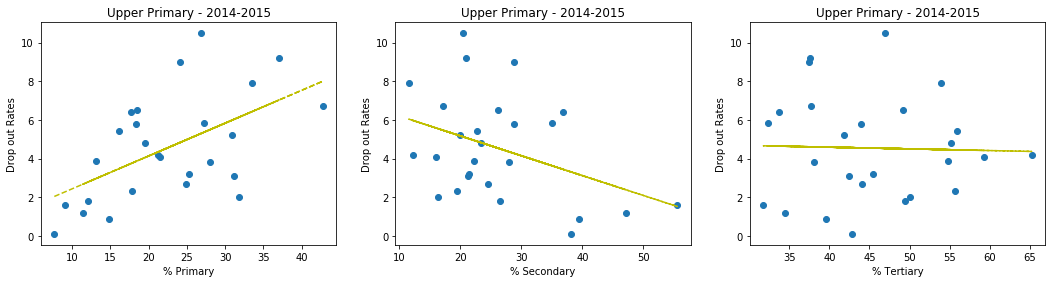

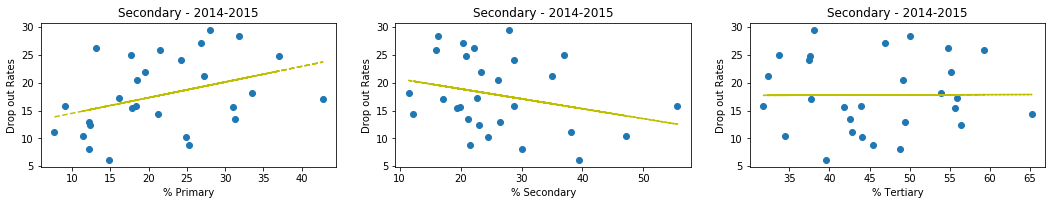

In [87]:
# find correration between each education sectors dropout rates with % contribution of 
# Primary, Secondary and Tertiary sub-sectors to total GDP

corr_to_plot_list = ['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']
corr_to_plot_against_list = ['% Primary','% Secondary','% Tertiary']

for row in range(len(corr_to_plot_list)):
    
    cnt=1
    # create figure for every drop out rate education category
    plt.figure(row+1,figsize=(18,9))
    
    # looping over the list of % primary, % secondary and % tertiary
    for col in corr_to_plot_against_list:
        
        # creating subplots with 1 row and 3 columns since there are 3 drop out rates that need to be analysed
        plt.subplot(row+1,3,cnt)

        # Since drop out rates in education columns have NaNs in them, 'cleaning them up" by only considering the indexes that are finite.
        idx = np.isfinite(dropout_final_df[col]) & np.isfinite(dropout_final_df[corr_to_plot_list[row]])

        # setting plot attributes
        plt.title(corr_to_plot_list[row])
        plt.xlabel(col)
        plt.ylabel('Drop out Rates')

        # plotting the scatter plot
        plt.scatter(x=col, y=corr_to_plot_list[row], data=dropout_final_df)

        # generating the BEST-FIT line by calculating the m and c values of the eq y=mx+c of linear line
        m,c = np.polyfit(dropout_final_df[col][idx], dropout_final_df[corr_to_plot_list[row]][idx], 1)

        #plotting the graph
        plt.plot(dropout_final_df[col], m*dropout_final_df[col] + c, '--y')

        cnt+=1
    
    plt.show()

# Q2: You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

## Ans: There is a NEGATIVE correlation between the drop out rates of all the 3 education sectors(Primary, Upper Primary, and Secondary) to the population. i.e., as the population increases the drop out rates decreases

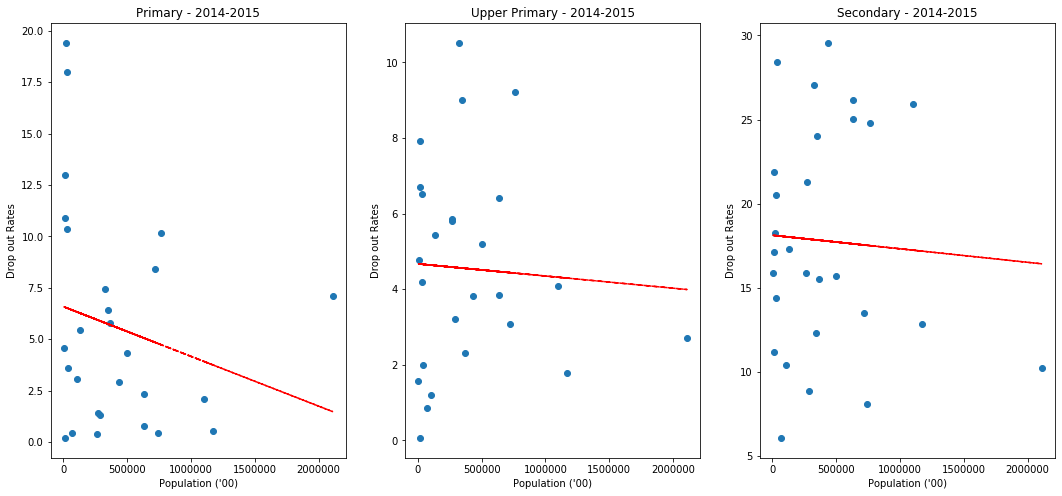

In [88]:
plt.figure(figsize=(18,8))

corr_to_plot_list = ['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']

cnt=1

for col in corr_to_plot_list:
    # creating subplots with 1 row and 3 columns since there are 3 drop out rates that need to be analysed
    plt.subplot(1,3,cnt)

    # Since drop out rates in education columns have NaNs in them, 'cleaning them up" by only considering the indexes that are finite.
    idx = np.isfinite(dropout_final_df['Population (\'00)']) & np.isfinite(dropout_final_df[col])

    # setting plot attributes
    plt.title(col)
    plt.xlabel('Population (\'00)')
    plt.ylabel('Drop out Rates')

    # plotting the scatter plot
    plt.scatter(x='Population (\'00)', y=col, data=dropout_final_df)

    # generating the BEST-FIT line by calculating the m and c values of the eq y=mx+c of linear line
    m,c = np.polyfit(dropout_final_df['Population (\'00)'][idx], dropout_final_df[col][idx], 1)

    #plotting the graph
    plt.plot(dropout_final_df['Population (\'00)'], m*dropout_final_df['Population (\'00)'] + c, '--r')

    cnt+=1
    
plt.show()

# Q3: Write down the key insights you draw from this data:



## Insights:
- The more the population increases the more people tend to NOT drop out of education.
- The drop out rates __increases__ in all the Education categories (Primary, Secondary, and Tertiary) with respect to the primary sector (Agriculture).
- The drop out rates __decreases__ in all the Education categories (Primary, Secondary, and Tertiary) with respect to the secondary sector (Industry).
- The drop out rates __increases__ ONLY in the __Primary Education__ with respect to the Tertiary Sector(Services)
- The drop out rates __increases__ in all the Education categories (Primary, Secondary, and Tertiary) with respect to the __GDP per capita__

## Hypothesis
- The reason behind the negative correlation between the drop our rates of all the education sectors (Primary, Secondary, and Tertiary) and Population may be beacuse when the population is less, people have minimal work profiles or jobs in the market, and majority of the people venture into small scale businesses where the education is less important, but as the population increases with time, the survival of people becomes difficult, and the diversity with regard to the education profiles also increases, such as behavorial analyst, coaching institutes, etc. For most of these professions, education till secondary becomes mandatory. Another reason could be the affordability. In ealier times, when the population was less, only priviledge students that have strong financial background could afford the education as the job profiles were also very limited, such as doctors, lawyers, engineers, but as the population increases, the job opportunities also increases, and so the education of most of the non-high profile jobs require less investment on education.

- A similar reason can be brought in for the Primary sector of the economy, which is Agriculture. It's observed that as the % contribution of primary sector(Agriculture) increases, more and more children tend to drop out of the education, primarily because of the profit people earn in Agriculture. Education at this point seems less important as earning money and survival becaomes the priority, which is fulfilled by the growth in GDP for Primary sector.